# Introdução

## Cérebro humano

O cérebro possui características que não estão presentes em computadores:

- Paralelismo massivo
- Representação e computação distribuida
- Habilidade de aprendizado
- Habilidade de generalização
- Adaptabilidade
- Tolerância a falhas
- Baixo consumo de energia

## Redes neurais artificiais

- A ideia da rede neural artificial é **"Simular" partes da características do cérebro humano** na forma de modelo um computacional:

    - Paralelismo
    - Habilidade de aprendizado e representação
    - Adaptabilidade, etc

- Modelos neurais também são conhecidos como **Processamento paralelo distribuído (PDP)**

- O processamento deste sistema é distribuído por meio de **camadas (Layers)** de neurônios

- Processamento parelelo $\rightarrow$ Todos os neurônios de uma camada processam as entradas simultaneamente.

- É composta por conjuntos de neurônios (Camadas ou Layers) interconectados.

- Os neurônios podem ser de diferentes tipos dependo da sua localização:
    - Camada de entrada $\rightarrow$ Recebe o sinal do ambiente
    - Intermediário $\rightarrow$ Processa informações sobre neurônios
    - Saída $\rightarrow$ Devolve o sinal ambiente

Segue um exemplo abaixo (https://www.tibco.com/reference-center/what-is-a-neural-network):

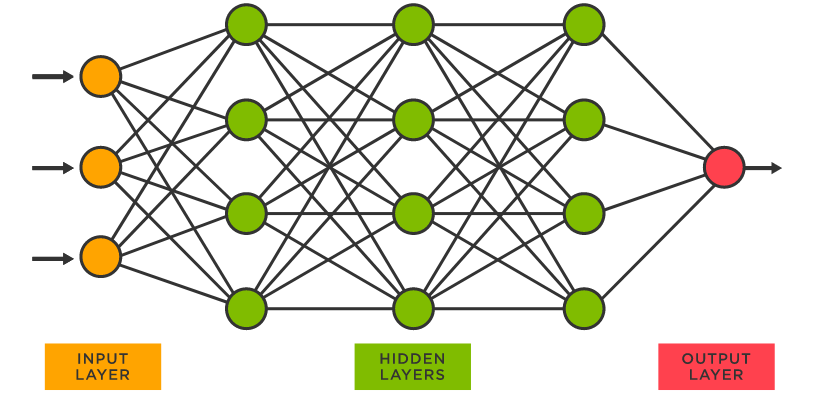

### Aplicações das redes Neurais

- Classificação $\rightarrow$ Decide categoria ou grupo de um valor de entrada
- Reconhecimento de padrões $\rightarrow$ Identifica estrutura ou padrões de dados
- Regressão $\rightarrow$ Prevê valores ou modelos reais
- Otimização $\rightarrow$ Encontra o melhor conjunto de valores dadas restrições
- Filtragem de ruído $\rightarrow$ Retira componentes irrelevantes de sinais
- Etc

### Modelos de redes Neurais

Existem vários tipos de famílias de redes neurais:

- Perceptron em uma única camada
- Perceptron de múltiplas camadas (ou redes neurais densas)
- Redes neurais convolucionais (CNN)
- Redes recorrentes
- Mapa auto-organizáveis
- Etc

Segue o mapa abaixo (https://towardsdatascience.com/the-mostly-complete-chart-of-neural-networks-explained-3fb6f2367464):

In [297]:
%reload_ext itikz

In [298]:
%%writefile tikz_neural_chart.tex
\documentclass{standalone}
\usepackage{color}
\usepackage{adjustbox}
\usepackage{tikz}
\usepackage[T1]{fontenc}% http://ctan.org/pkg/fontenc
\usepackage{lmodern}

\usetikzlibrary {graphs,shapes.geometric,arrows.meta,calc}

\definecolor{blue}{RGB}{12,77,162}
\definecolor{yellow}{RGB}{255,182,0}
\definecolor{green}{RGB}{51,159,51}                  % Alterando o aspécto da cor 
\definecolor{darkpink}{rgb}{0.91, 0.33, 0.5}
                                      
\begin{document}
    {% block content %}
    {% endblock %}
\end{document}

Overwriting tikz_neural_chart.tex


In [212]:
neural_chart = {'neuron':.75,'row sep':0.75,'edges':'thick'}

In [321]:
cells = {
    'Input': {'color': 'yellow','name':'Entrada', 'detail': 'None'},
    'InputConnected': {'color': 'yellow','name':'Entrada realimentada', 'detail': 'Filled'},
    'InputNoise': {'color': 'yellow','name':'Entrada com ruído', 'detail': 'Square'},
    'Output': {'color': 'orange','name':'Saída', 'detail': 'None'},
    'OutputConnected': {'color': 'orange','name':'Saída realimentada', 'detail': 'Filled'},
    'Hidden': {'color': 'green','name':'Oculta', 'detail': 'None'},
    'Probabilistic': {'color': 'green','name':'Probabilística oculta', 'detail': 'Circle'},
    'Recurrent': {'color': 'blue','name':'Recorrente (Mémoria de prazo curto)', 'detail': 'Circle'},
    'Memory': {'color': 'blue','name':'LSTM - Long Short Term Memory Mémoria de curto/longo prazo', 'detail': 'DoubleCircle'},
    'DifferentMemory': {'color': 'blue','name':'GRU - Gate Recurrent Unit - Mémoria de longo prazo', 'detail': 'SmallCircle'},
    'Convolutional': {'color': 'darkpink','name':'Convolucional e/ou Pooling', 'detail': 'Circle'},
    'Deconvolutional': {'color': 'darkpink','name':'Deconvolucional e/ou Unpooling', 'detail': 'SmallCircle'},
    'Gap': {'color': 'violet','name':'Gap ou flatten', 'detail': 'None'}
}
cell_names = [cell for cell in cells]
n = len(cell_names)

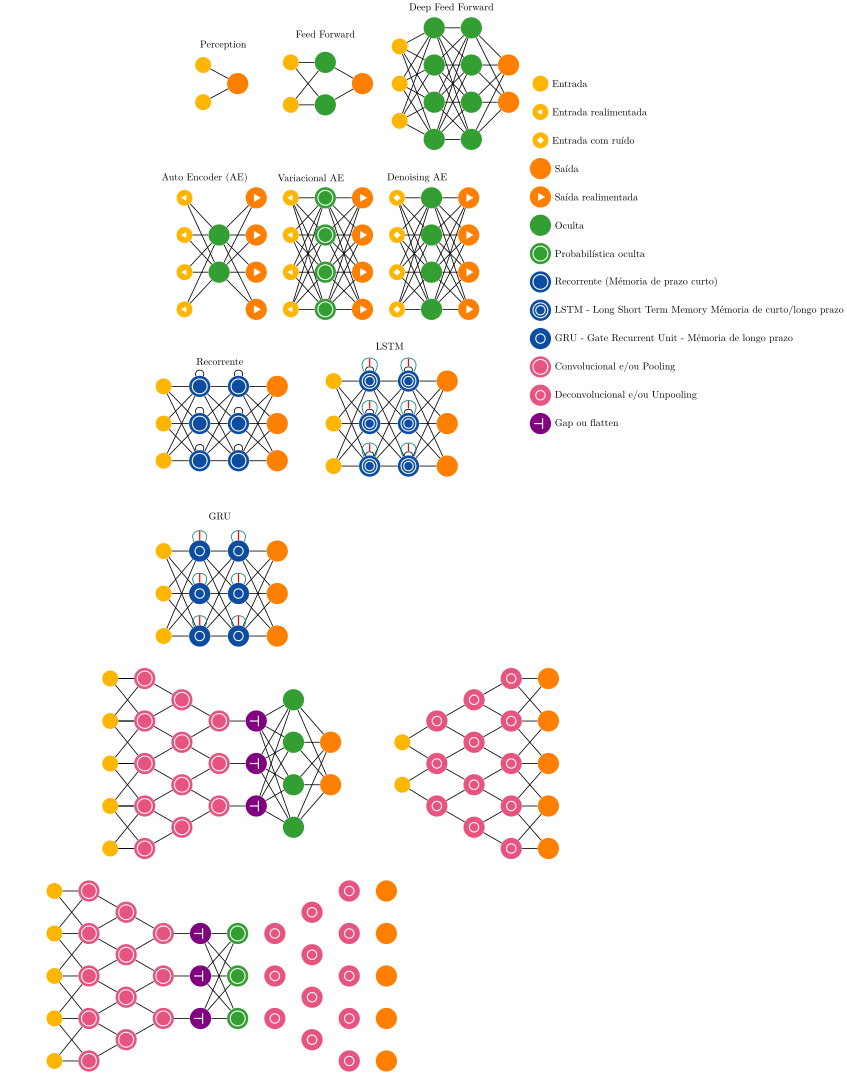

In [331]:
%%itikz --temp-dir --as-jinja

{% extends "tikz_neural_chart.tex" %}

{% block content %}
    {% for cell in cells -%}
    \newcommand{\{{ cell }}Cell}[2]{
        \node (#1) [{{ cell }}Cell,#2] {};
        {%- if cells[cell]['detail']=='Circle' %}
        \node at(#1) [DetailCell{{'Input' if 'Input' in cell else ''}}] {};
        {%- endif %}
        {%- if cells[cell]['detail']=='Filled' %}
        \node at(#1) [DetailFilled{{'Input' if 'Input' in cell else ''}}] {};
        {%- endif %}
        {%- if cells[cell]['detail']=='Square' %}
        \node at(#1) [DetailSquare] {};
        {%- endif %}
        {%- if cells[cell]['detail']=='DoubleCircle' %}
        \node at(#1) [DetailCell] {};
        \node at(#1) [DetailCell, minimum width={{ np.round(neural_chart['neuron']*0.4,6) }} cm] {};
        {%- endif %}
        {%- if cells[cell]['detail']=='SmallCircle' %}
        \node at(#1) [DetailCell, minimum width={{ np.round(neural_chart['neuron']*0.4,6) }} cm] {};
        {%- endif %}
        {%- if cell=='Gap' %}
        \draw [white, very thick] (#1) ++({{ -np.round(neural_chart['neuron']*0.3,6) }},0) -| 
                                       ++({{ np.round(neural_chart['neuron']*0.4,6) }},{{ np.round(neural_chart['neuron']*0.25,6) }}) --
                                       ++(0,{{ -np.round(neural_chart['neuron']*0.5,6) }});
        {%- endif %}
    }
    {% endfor %}
    \begin{tikzpicture}[
        {% for cell in cells -%}
            {{ cell }}Cell/.style = {circle,fill={{ cells[cell]['color'] }},minimum width={{ neural_chart['neuron'] if 'Input' not in cell else neural_chart['neuron']*0.75 }} cm},
        {% endfor -%}
        {% for cell in ['','Input'] -%}
        DetailCell{{ cell }}/.style = {circle,line width = {{ np.round(neural_chart['neuron']*0.05,6) }} cm,draw=white, minimum width={{ np.round(neural_chart['neuron']*0.7 if 'Input' not in cell else neural_chart['neuron']*0.7*0.75,6) }} cm},
        DetailFilled{{ cell }}/.style = {isosceles triangle, isosceles triangle apex angle=60, {%- if 'Input' in cell -%} rotate=60 {%- endif -%}, draw=none, fill = white, minimum size={{ np.round(neural_chart['neuron']*0.33 if 'Input' not in cell else neural_chart['neuron']*0.33*0.75,6) }} cm,inner sep = 0},
        {% endfor -%}
        DetailSquare/.style = {regular polygon, regular polygon sides=4, shape border rotate=45, draw=none, fill = white, minimum size={{ np.round(neural_chart['neuron']*0.45*0.75,6) }} cm,inner sep = 0}
    ]
        
        \begin{scope}
            \matrix[column sep = {{ neural_chart['row sep']*neural_chart['neuron'] }}cm]{
                \InputCell{I1}{} &                   \\
                                 & \OutputCell{O}{} \\
                \InputCell{I2}{} &                   \\
            };
            \graph[use existing nodes,edges={{'{'}}{{ neural_chart['edges'] }}{{'}'}}]{
                    \foreach \i in {1,2}{
                        I\i -- O;
                    };
            };
            \node [above right of = I1] {Perception};
        \end{scope}
            
        \begin{scope}[xshift={{ 5*neural_chart['neuron'] }}cm]
            \matrix[column sep = {{ neural_chart['row sep']*neural_chart['neuron'] }}cm]{
                \InputCell{I1}{} & \HiddenCell{H1}{} &                  \\
                                 &                   & \OutputCell{O}{} \\
                \InputCell{I2}{} & \HiddenCell{H2}{} &                  \\
            };
            \graph[use existing nodes,edges={{'{'}}{{ neural_chart['edges'] }}{{'}'}}]{
                \foreach \i in {1,2}
                    \foreach \h in {1,2}{
                        I\i -- H\h;
                    };
                \foreach \i in {1,2}{
                    H\i -- O;
                };
            };
            \node [above of = H1, align = center] {Feed Forward};
        \end{scope}
            
        \begin{scope}[xshift={{ 11*neural_chart['neuron'] }}cm]
            \matrix[column sep = {{ neural_chart['row sep']*neural_chart['neuron'] }}cm]{
                                 & \HiddenCell{H11}{} & \HiddenCell{H21}{} &                   \\
                \InputCell{I1}{} &                    &                    &                   \\
                                 & \HiddenCell{H12}{} & \HiddenCell{H22}{} & \OutputCell{O1}{} \\
                \InputCell{I2}{} &                    &                    &                   \\
                                 & \HiddenCell{H13}{} & \HiddenCell{H23}{} & \OutputCell{O2}{} \\
                \InputCell{I3}{} &                    &                    &                   \\
                                 & \HiddenCell{H14}{} & \HiddenCell{H24}{} &                   \\
            };
            \graph[use existing nodes,edges={{'{'}}{{ neural_chart['edges'] }}{{'}'}}]{
                \foreach \i in {1,...,3}
                    \foreach \h in {1,...,4}{
                        I\i -- H1\h;
                    };
                \foreach \h in {1,...,4}
                    \foreach \w in {1,...,4}{
                        H1\h -- H2\w;
                    };
                \foreach \h in {1,...,4}
                    \foreach \o in {1,2}{
                        H2\h -- O\o;
                    };
            };
            \node [above left of = H21] {Deep Feed Forward};
        \end{scope}
            
        \begin{scope}[yshift={{ -8*neural_chart['neuron'] }}cm]
            \matrix[column sep = {{ neural_chart['row sep']*neural_chart['neuron'] }}cm, row sep = {{ neural_chart['neuron']*0.75 }} cm]{
                \InputConnectedCell{I1}{} &                   & \OutputConnectedCell{O1}{} \\
                \InputConnectedCell{I2}{} & \HiddenCell{H1}{} & \OutputConnectedCell{O2}{} \\
                \InputConnectedCell{I3}{} & \HiddenCell{H2}{} & \OutputConnectedCell{O3}{} \\
                \InputConnectedCell{I4}{} &                   & \OutputConnectedCell{O4}{} \\
            };
            \graph[use existing nodes,edges={{'{'}}{{ neural_chart['edges'] }}{{'}'}}]{
                \foreach \i in {1,...,4}
                    \foreach \h in {1,2}{
                        I\i -- H\h;
                    };
                \foreach \h in {1,2}
                    \foreach \o in {1,...,4}{
                        H\h -- O\o;
                    };
            };
            \node [above right of = I1] {Auto Encoder (AE)};
        \end{scope}
            
            
        \begin{scope}[yshift={{ -8*neural_chart['neuron'] }}cm, xshift={{ 5*neural_chart['neuron'] }}cm]
            \matrix[column sep = {{ neural_chart['row sep']*neural_chart['neuron'] }}cm, row sep = {{ neural_chart['neuron']*0.75 }} cm]{
                \InputConnectedCell{I1}{} & \ProbabilisticCell{H1}{} & \OutputConnectedCell{O1}{} \\
                \InputConnectedCell{I2}{} & \ProbabilisticCell{H2}{} & \OutputConnectedCell{O2}{} \\
                \InputConnectedCell{I3}{} & \ProbabilisticCell{H3}{} & \OutputConnectedCell{O3}{} \\
                \InputConnectedCell{I4}{} & \ProbabilisticCell{H4}{} & \OutputConnectedCell{O4}{} \\
            };
            \graph[use existing nodes,edges={{'{'}}{{ neural_chart['edges'] }}{{'}'}}]{
                \foreach \i in {1,...,4}
                    \foreach \h in {1,...,4}{
                        I\i -- H\h;
                    };
                \foreach \h in {1,...,4}
                    \foreach \o in {1,...,4}{
                        H\h -- O\o;
                    };
            };
            \node [above right of = I1] {Variacional AE};
        \end{scope}
            
        \begin{scope}[yshift={{ -8*neural_chart['neuron'] }}cm, xshift={{ 10*neural_chart['neuron'] }}cm]
            \matrix[column sep = {{ neural_chart['row sep']*neural_chart['neuron'] }}cm, row sep = {{ neural_chart['neuron']*0.75 }} cm]{
                \InputNoiseCell{I1}{} & \HiddenCell{H1}{} & \OutputConnectedCell{O1}{} \\
                \InputNoiseCell{I2}{} & \HiddenCell{H2}{} & \OutputConnectedCell{O2}{} \\
                \InputNoiseCell{I3}{} & \HiddenCell{H3}{} & \OutputConnectedCell{O3}{} \\
                \InputNoiseCell{I4}{} & \HiddenCell{H4}{} & \OutputConnectedCell{O4}{} \\
            };
            \graph[use existing nodes,edges={{'{'}}{{ neural_chart['edges'] }}{{'}'}}]{
                \foreach \i in {1,...,4}
                    \foreach \h in {1,...,4}{
                        I\i -- H\h;
                    };
                \foreach \h in {1,...,4}
                    \foreach \o in {1,...,4}{
                        H\h -- O\o;
                    };
            };
            \node [above right of = I1] {Denoising AE};
        \end{scope}
            
        \begin{scope}[yshift={{ -16*neural_chart['neuron'] }}cm]
            \matrix[column sep = {{ 1.1*neural_chart['row sep']*neural_chart['neuron'] }}cm, row sep = {{ neural_chart['neuron']*0.75 }} cm]{
                \InputCell{I1}{} & \RecurrentCell{H11}{} & \RecurrentCell{H21}{} & \OutputCell{O1}{} \\
                \InputCell{I2}{} & \RecurrentCell{H12}{} & \RecurrentCell{H22}{} & \OutputCell{O2}{} \\
                \InputCell{I3}{} & \RecurrentCell{H13}{} & \RecurrentCell{H23}{} & \OutputCell{O3}{} \\
            };
            \graph[use existing nodes,edges={{'{'}}{{ neural_chart['edges'] }}{{'}'}}]{
                \foreach \i in {1,...,3}
                    \foreach \h in {1,...,3}{
                        I\i -- H1\h;
                    };
                \foreach \x in {1,...,3}
                    \foreach \y in {1,...,3}{
                        H1\x -- H2\y;
                    };
                \foreach \h in {1,...,3}
                    \foreach \o in {1,...,3}{
                        H2\h -- O\o;
                    };
                {%- for h in range(1,3) -%}
                %\foreach \h in {1,2}{
                %   H\h{{ h }} -- H\h{{ h+1 }}; 
                %};
                {%- endfor %}
                \foreach \l in {1,2}
                    \foreach \h in {1,...,3}{
                         H\l\h -- [loop above, looseness=3, in=70, out=110] H\l\h;%<-, 
                    };
               
                
            };
            \node [above right of = H11, yshift=0.5em] {Recorrente};
        \end{scope}
            
        \begin{scope}[yshift={{ -16*neural_chart['neuron'] }}cm, xshift={{ 8*neural_chart['neuron'] }}cm]
            \matrix[column sep = {{ 1.1*neural_chart['row sep']*neural_chart['neuron'] }}cm, row sep = {{ neural_chart['neuron'] }} cm]{
                \InputCell{I1}{} & \MemoryCell{H11}{} & \MemoryCell{H21}{} & \OutputCell{O1}{} \\
                \InputCell{I2}{} & \MemoryCell{H12}{} & \MemoryCell{H22}{} & \OutputCell{O2}{} \\
                \InputCell{I3}{} & \MemoryCell{H13}{} & \MemoryCell{H23}{} & \OutputCell{O3}{} \\
            };
            \graph[use existing nodes,edges={{'{'}}{{ neural_chart['edges'] }}{{'}'}}]{
                \foreach \i in {1,...,3}
                    \foreach \h in {1,...,3}{
                        I\i -- H1\h;
                    };
                \foreach \x in {1,...,3}
                    \foreach \y in {1,...,3}{
                        H1\x -- H2\y;
                    };
                \foreach \h in {1,...,3}
                    \foreach \o in {1,...,3}{
                        H2\h -- O\o;
                    };
                {%- for h in range(1,3) -%}
                %\foreach \h in {1,2}{
                %   H\h{{ h }} -- H\h{{ h+1 }}; 
                %};
                {%- endfor %}
                \foreach \l in {1,2}
                    \foreach \h in {1,...,3}{
                         H\l\h -- [loop above, looseness=2, in=70, out=110] H\l\h;
                        H\l\h -- [teal, loop above, looseness=5, in=60, out=120] H\l\h;
                    };
               
                
            };
            \foreach \l in {1,2}
                \foreach \h in {1,...,3}{
                     \draw [red,very thick] ($ (H\l\h.north) + (0,{{ neural_chart['neuron']*0.2 }}) $) -- ++(0,{{ neural_chart['neuron']*0.35 }}); 
                };
            \node [above right of = H11, yshift=1.5em] {LSTM};
        \end{scope}
            
        \begin{scope}[yshift={{ -24*neural_chart['neuron'] }}cm]
            \matrix[column sep = {{ 1.1*neural_chart['row sep']*neural_chart['neuron'] }}cm, row sep = {{ neural_chart['neuron'] }} cm]{
                \InputCell{I1}{} & \DifferentMemoryCell{H11}{} & \DifferentMemoryCell{H21}{} & \OutputCell{O1}{} \\
                \InputCell{I2}{} & \DifferentMemoryCell{H12}{} & \DifferentMemoryCell{H22}{} & \OutputCell{O2}{} \\
                \InputCell{I3}{} & \DifferentMemoryCell{H13}{} & \DifferentMemoryCell{H23}{} & \OutputCell{O3}{} \\
            };
            \graph[use existing nodes,edges={{'{'}}{{ neural_chart['edges'] }}{{'}'}}]{
                \foreach \i in {1,...,3}
                    \foreach \h in {1,...,3}{
                        I\i -- H1\h;
                    };
                \foreach \x in {1,...,3}
                    \foreach \y in {1,...,3}{
                        H1\x -- H2\y;
                    };
                \foreach \h in {1,...,3}
                    \foreach \o in {1,...,3}{
                        H2\h -- O\o;
                    };
                {%- for h in range(1,3) -%}
                %\foreach \h in {1,2}{
                %   H\h{{ h }} -- H\h{{ h+1 }}; 
                %};
                {%- endfor %}
                \foreach \l in {1,2}
                    \foreach \h in {1,...,3}{
                        H\l\h -- [teal, loop above, looseness=4, in=60, out=120] H\l\h;
                    };
               
                
            };
            \foreach \l in {1,2}
                \foreach \h in {1,...,3}{
                     \draw [-,red,very thick] (H\l\h.north) -- ++(0,{{ neural_chart['neuron']*0.45 }}); 
                };
            \node [above right of = H11, yshift=1.5em] {GRU};
        \end{scope}
            
        \begin{scope}[yshift={{ -32*neural_chart['neuron'] }}cm]
            \matrix[column sep = {{ neural_chart['row sep']*neural_chart['neuron'] }}cm]{
                \InputCell{I1}{} & \ConvolutionalCell{C11}{} &                           &                           &                &                   &                   \\
                                 &                           & \ConvolutionalCell{C21}{} &                           &                & \HiddenCell{H1}{} &                   \\
                \InputCell{I2}{} & \ConvolutionalCell{C12}{} &                           & \ConvolutionalCell{C31}{} & \GapCell{G1}{} &                   &                   \\
                                 &                           & \ConvolutionalCell{C22}{} &                           &                & \HiddenCell{H2}{} & \OutputCell{O1}{} \\
                \InputCell{I3}{} & \ConvolutionalCell{C13}{} &                           & \ConvolutionalCell{C32}{} & \GapCell{G2}{} &                   &                   \\
                                 &                           & \ConvolutionalCell{C23}{} &                           &                & \HiddenCell{H3}{} & \OutputCell{O2}{} \\
                \InputCell{I4}{} & \ConvolutionalCell{C14}{} &                           & \ConvolutionalCell{C33}{} & \GapCell{G3}{} &                   &                   \\
                                 &                           & \ConvolutionalCell{C24}{} &                           &                & \HiddenCell{H4}{} &                   \\
                \InputCell{I5}{} & \ConvolutionalCell{C15}{} &                           &                           &                &                   &                   \\  
            };
            \graph[use existing nodes,edges={{'{'}}{{ neural_chart['edges'] }}{{'}'}}]{
                \foreach \i in {1,...,5}{
                    I\i -- C1\i;
                };
                \foreach \i in {1,...,3}{
                    C3\i -- G\i;
                    \foreach \j in {1,...,4}{
                        G\i -- H\j;
                    };
                };
                \foreach \i in {1,...,4}{
                    \foreach \j in {1,2}{
                        H\i -- O\j;
                    };
                };

                {% for i in range(5) -%}
                I{{ i+1 }} -- C1{{ i+1 }};
                {%- if i<4 -%}
                I{{ i+1 }} -- C1{{ i+2 }};
                {%- endif -%}
                {%- if i>0 -%}
                I{{ i+1 }} -- C1{{ i }};
                {%- endif -%}
                {%- endfor %}
                {% for j in range(2) -%}
                {% for i in range(5-j) -%}
                {%- if i<(4-j) -%}
                C{{ j+1 }}{{ i+1 }} -- C{{ j+2 }}{{ i+1 }};
                {%- endif -%}
                {%- if i>0 -%}
                C{{ j+1 }}{{ i+1 }} -- C{{ j+2 }}{{ i }};
                {%- endif -%}
                {%- endfor %}
                {%- endfor %}
            };
        \end{scope}
            
        \begin{scope}[yshift={{ -32*neural_chart['neuron'] }}cm, xshift={{ 12*neural_chart['neuron'] }}cm]
            \matrix[column sep = {{ neural_chart['row sep']*neural_chart['neuron'] }}cm]{
                                 &                             &                             & \DeconvolutionalCell{C31}{} & \OutputCell{O1}{} \\
                                 &                             & \DeconvolutionalCell{C21}{} &                             &                   \\
                                 & \DeconvolutionalCell{C11}{} &                             & \DeconvolutionalCell{C32}{} & \OutputCell{O2}{} \\
                \InputCell{I1}{} &                             & \DeconvolutionalCell{C22}{} &                             &                   \\
                                 & \DeconvolutionalCell{C12}{} &                             & \DeconvolutionalCell{C33}{} & \OutputCell{O3}{} \\
                \InputCell{I2}{} &                             & \DeconvolutionalCell{C23}{} &                             &                   \\
                                 & \DeconvolutionalCell{C13}{} &                             & \DeconvolutionalCell{C34}{} & \OutputCell{O4}{} \\
                                 &                             & \DeconvolutionalCell{C24}{} &                             &                   \\
                                 &                             &                             & \DeconvolutionalCell{C35}{} & \OutputCell{O5}{} \\
            };
            \graph[use existing nodes,edges={{'{'}}{{ neural_chart['edges'] }}{{'}'}}]{
                {% for i in range(2) -%}
                I{{ i+1 }} -- C1{{ i+1 }};I{{ i+1 }} -- C1{{ i+2 }};
                {%- endfor %}
                {% for j in range(2) -%}
                {% for i in range(j+3) -%}
                C{{ j+1 }}{{ i+1 }} -- C{{ j+2 }}{{ i+1 }};C{{ j+1 }}{{ i+1 }} -- C{{ j+2 }}{{ i+2 }};
                {%- endfor -%}
                {%- endfor %}
                {% for i in range(5) -%}
                C3{{ i+1 }} -- O{{ i+1 }};
                {%- if i<4 -%}
                C3{{ i+1 }} -- O{{ i+2 }};
                {%- endif -%}
                {%- if i>0 -%}
                C3{{ i+1 }} -- O{{ i }};
                {%- endif -%}
                {%- endfor %}
            };
        \end{scope}

        \begin{scope}[yshift={{ -42*neural_chart['neuron'] }}cm]
            \matrix[column sep = {{ neural_chart['row sep']*neural_chart['neuron'] }}cm]{
                \InputCell{I1}{} & \ConvolutionalCell{C11}{} &                           &                           &                &                          &                             &                             & \DeconvolutionalCell{D31}{} & \OutputCell{O1}{} \\
                                 &                           & \ConvolutionalCell{C21}{} &                           &                &                          &                             & \DeconvolutionalCell{D21}{} &                             &                   \\
                \InputCell{I2}{} & \ConvolutionalCell{C12}{} &                           & \ConvolutionalCell{C31}{} & \GapCell{G1}{} & \ProbabilisticCell{H1}{} & \DeconvolutionalCell{D11}{} &                             & \DeconvolutionalCell{D32}{} & \OutputCell{O2}{} \\
                                 &                           & \ConvolutionalCell{C22}{} &                           &                &                          &                             & \DeconvolutionalCell{D22}{} &                             &                   \\
                \InputCell{I3}{} & \ConvolutionalCell{C13}{} &                           & \ConvolutionalCell{C32}{} & \GapCell{G2}{} & \ProbabilisticCell{H2}{} & \DeconvolutionalCell{D12}{} &                             & \DeconvolutionalCell{D33}{} & \OutputCell{O3}{} \\
                                 &                           & \ConvolutionalCell{C23}{} &                           &                &                          &                             & \DeconvolutionalCell{D23}{} &                             &                   \\
                \InputCell{I4}{} & \ConvolutionalCell{C14}{} &                           & \ConvolutionalCell{C33}{} & \GapCell{G3}{} & \ProbabilisticCell{H3}{} & \DeconvolutionalCell{D13}{} &                             & \DeconvolutionalCell{D34}{} & \OutputCell{O4}{} \\
                                 &                           & \ConvolutionalCell{C24}{} &                           &                &                          &                             & \DeconvolutionalCell{D24}{} &                             &                   \\
                \InputCell{I5}{} & \ConvolutionalCell{C15}{} &                           &                           &                &                          &                             &                             & \DeconvolutionalCell{D35}{} & \OutputCell{O5}{} \\
            };
            \graph[use existing nodes,edges={{'{'}}{{ neural_chart['edges'] }}{{'}'}}]{
                \foreach \i in {1,...,3}{
                    C3\i -- G\i;
                    \foreach \j in {1,...,3}{
                        G\i -- H\j;
                    };
                };
                
                {% for i in range(5) -%}
                I{{ i+1 }} -- C1{{ i+1 }};
                {%- if i<4 -%}
                I{{ i+1 }} -- C1{{ i+2 }};
                {%- endif -%}
                {%- if i>0 -%}
                I{{ i+1 }} -- C1{{ i }};
                {%- endif -%}
                {%- endfor %}
                {% for j in range(2) -%}
                {% for i in range(5-j) -%}
                {%- if i<(4-j) -%}
                C{{ j+1 }}{{ i+1 }} -- C{{ j+2 }}{{ i+1 }};
                {%- endif -%}
                {%- if i>0 -%}
                C{{ j+1 }}{{ i+1 }} -- C{{ j+2 }}{{ i }};
                {%- endif -%}
                {%- endfor %}
                {%- endfor %}
            };
        \end{scope}
            
        \begin{scope}[xshift={{ 15*neural_chart['neuron'] }}cm]
            \InputCell{INPUT}{label={right:Entrada}}
            {% for i in range(1, n) -%}
                \{{ cell_names[i] }}Cell{{ '{' }}{{ cell_names[i].upper() }}{{ '}' }}{below of = {{ cell_names[i-1].upper() }}, label={right:{{ cells[cell_names[i]]['name'] }}}}
            {% endfor %}
        \end{scope}
    \end{tikzpicture}%
{% endblock %}

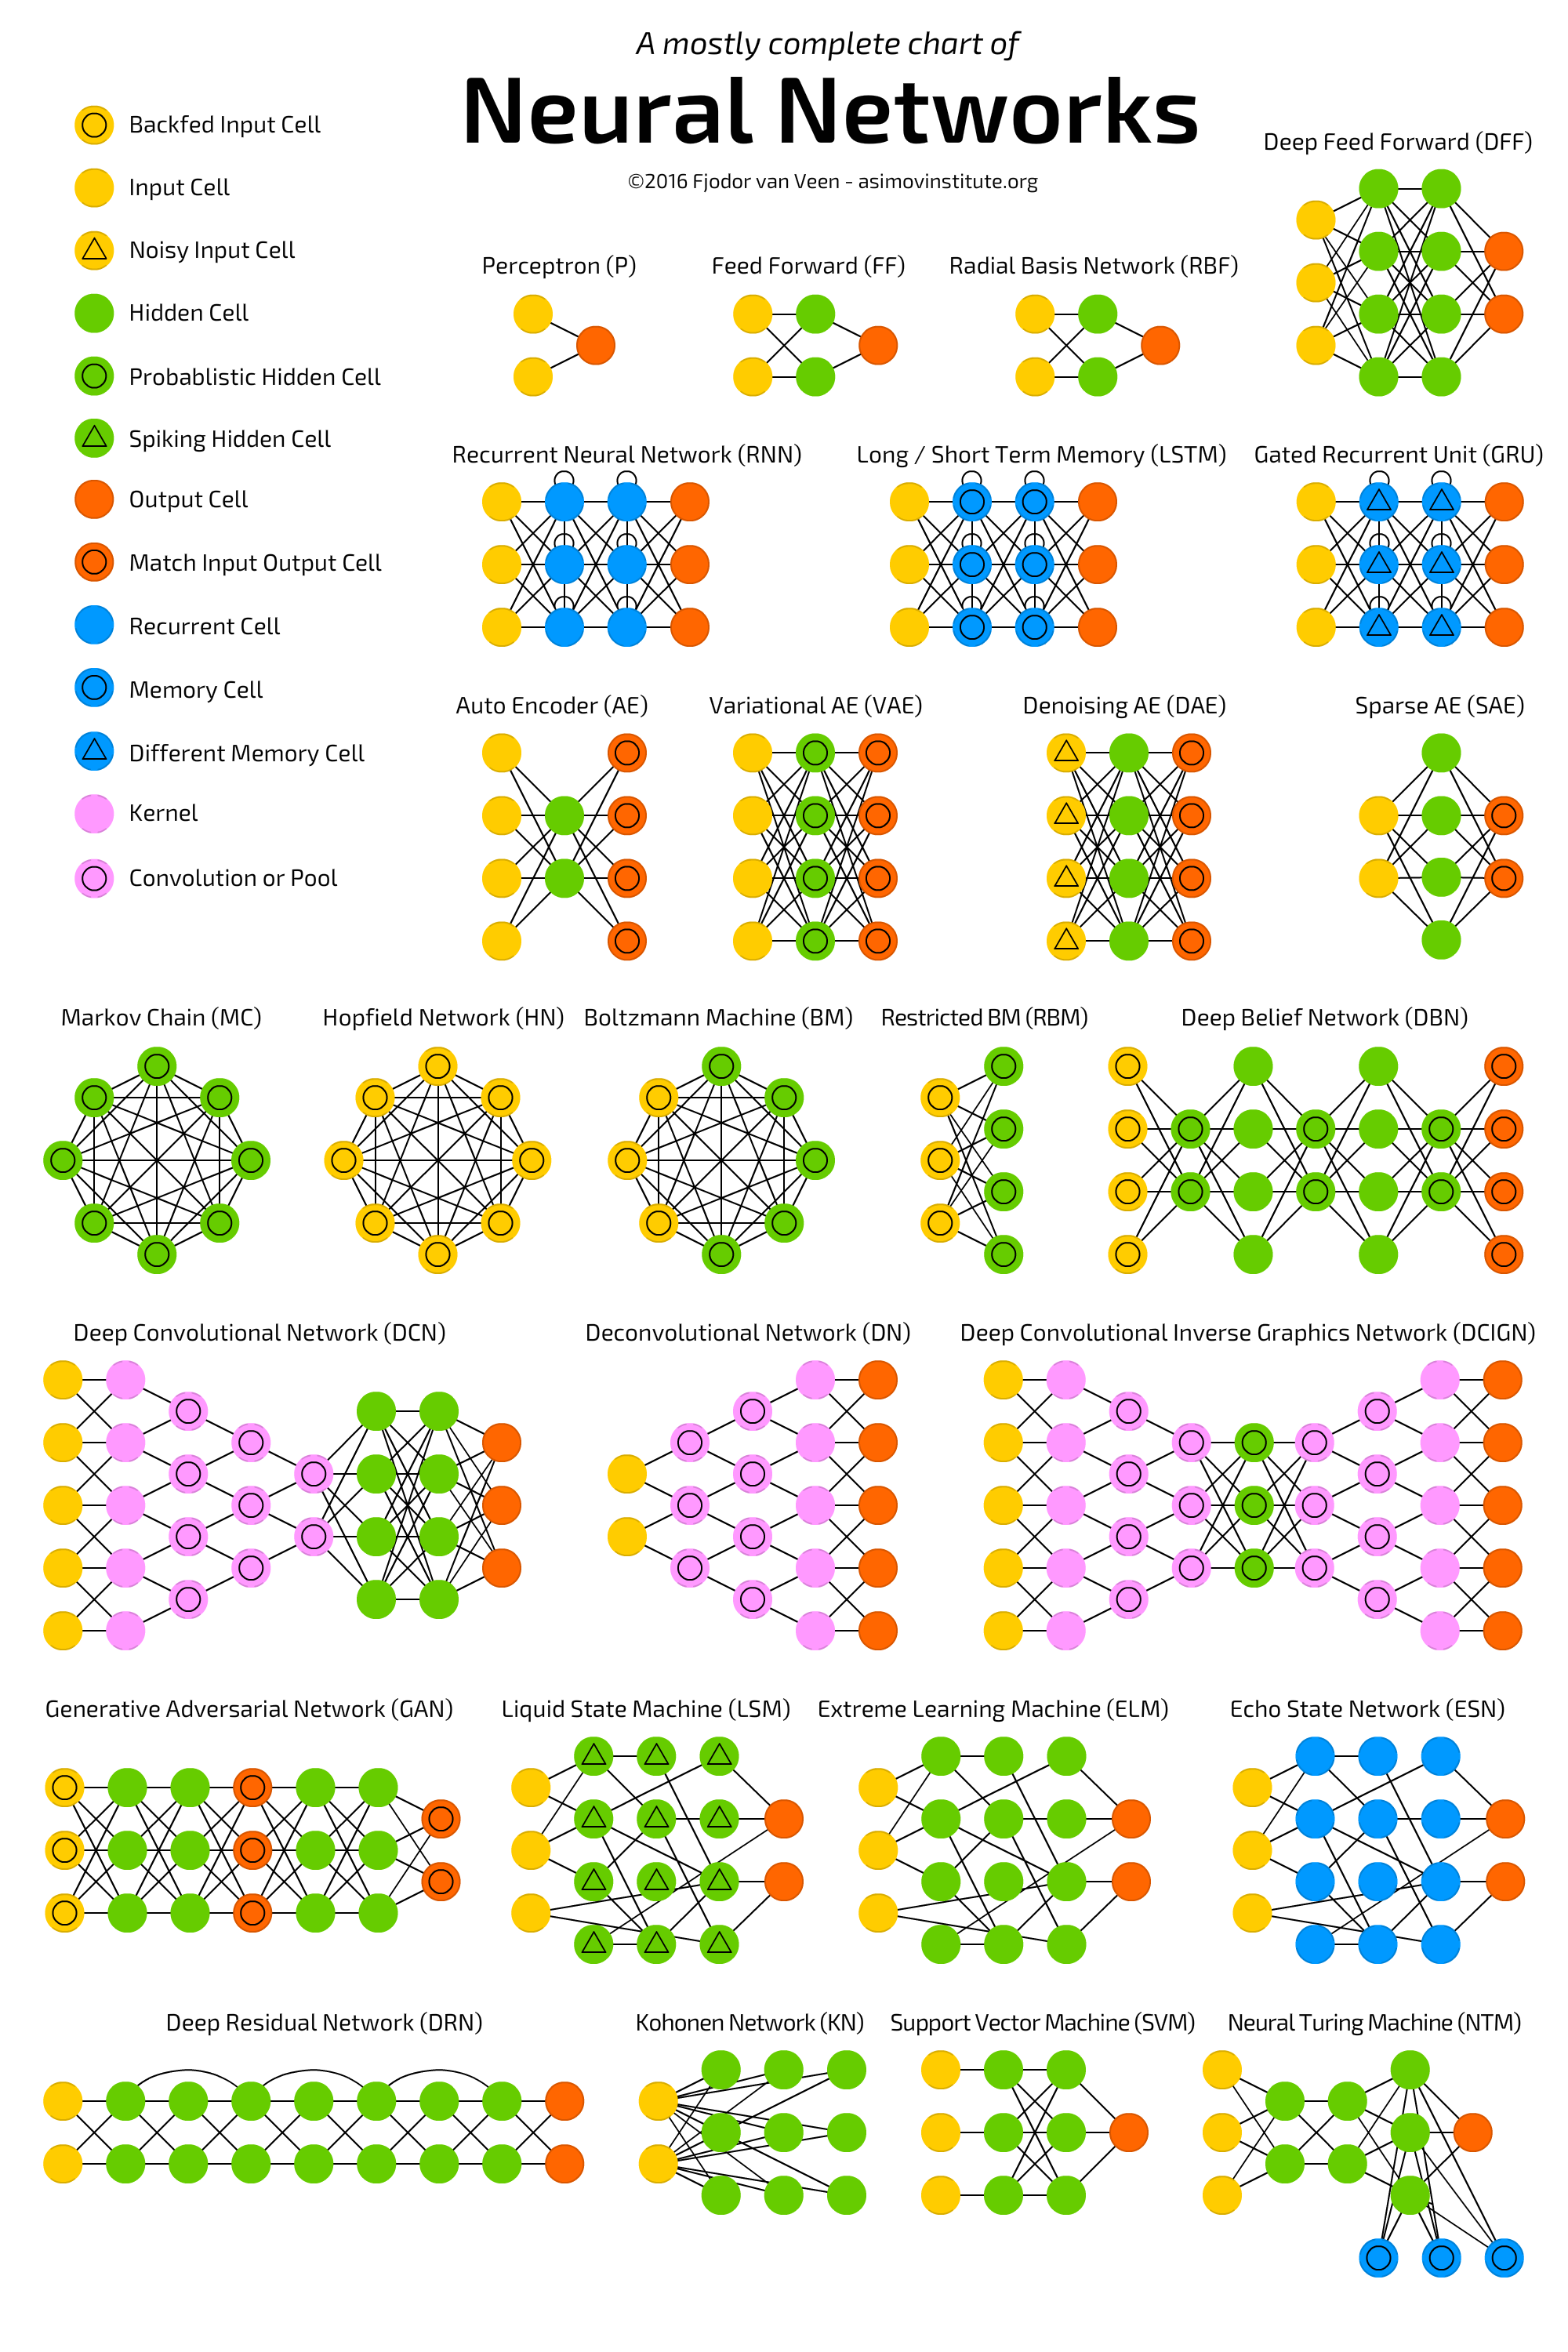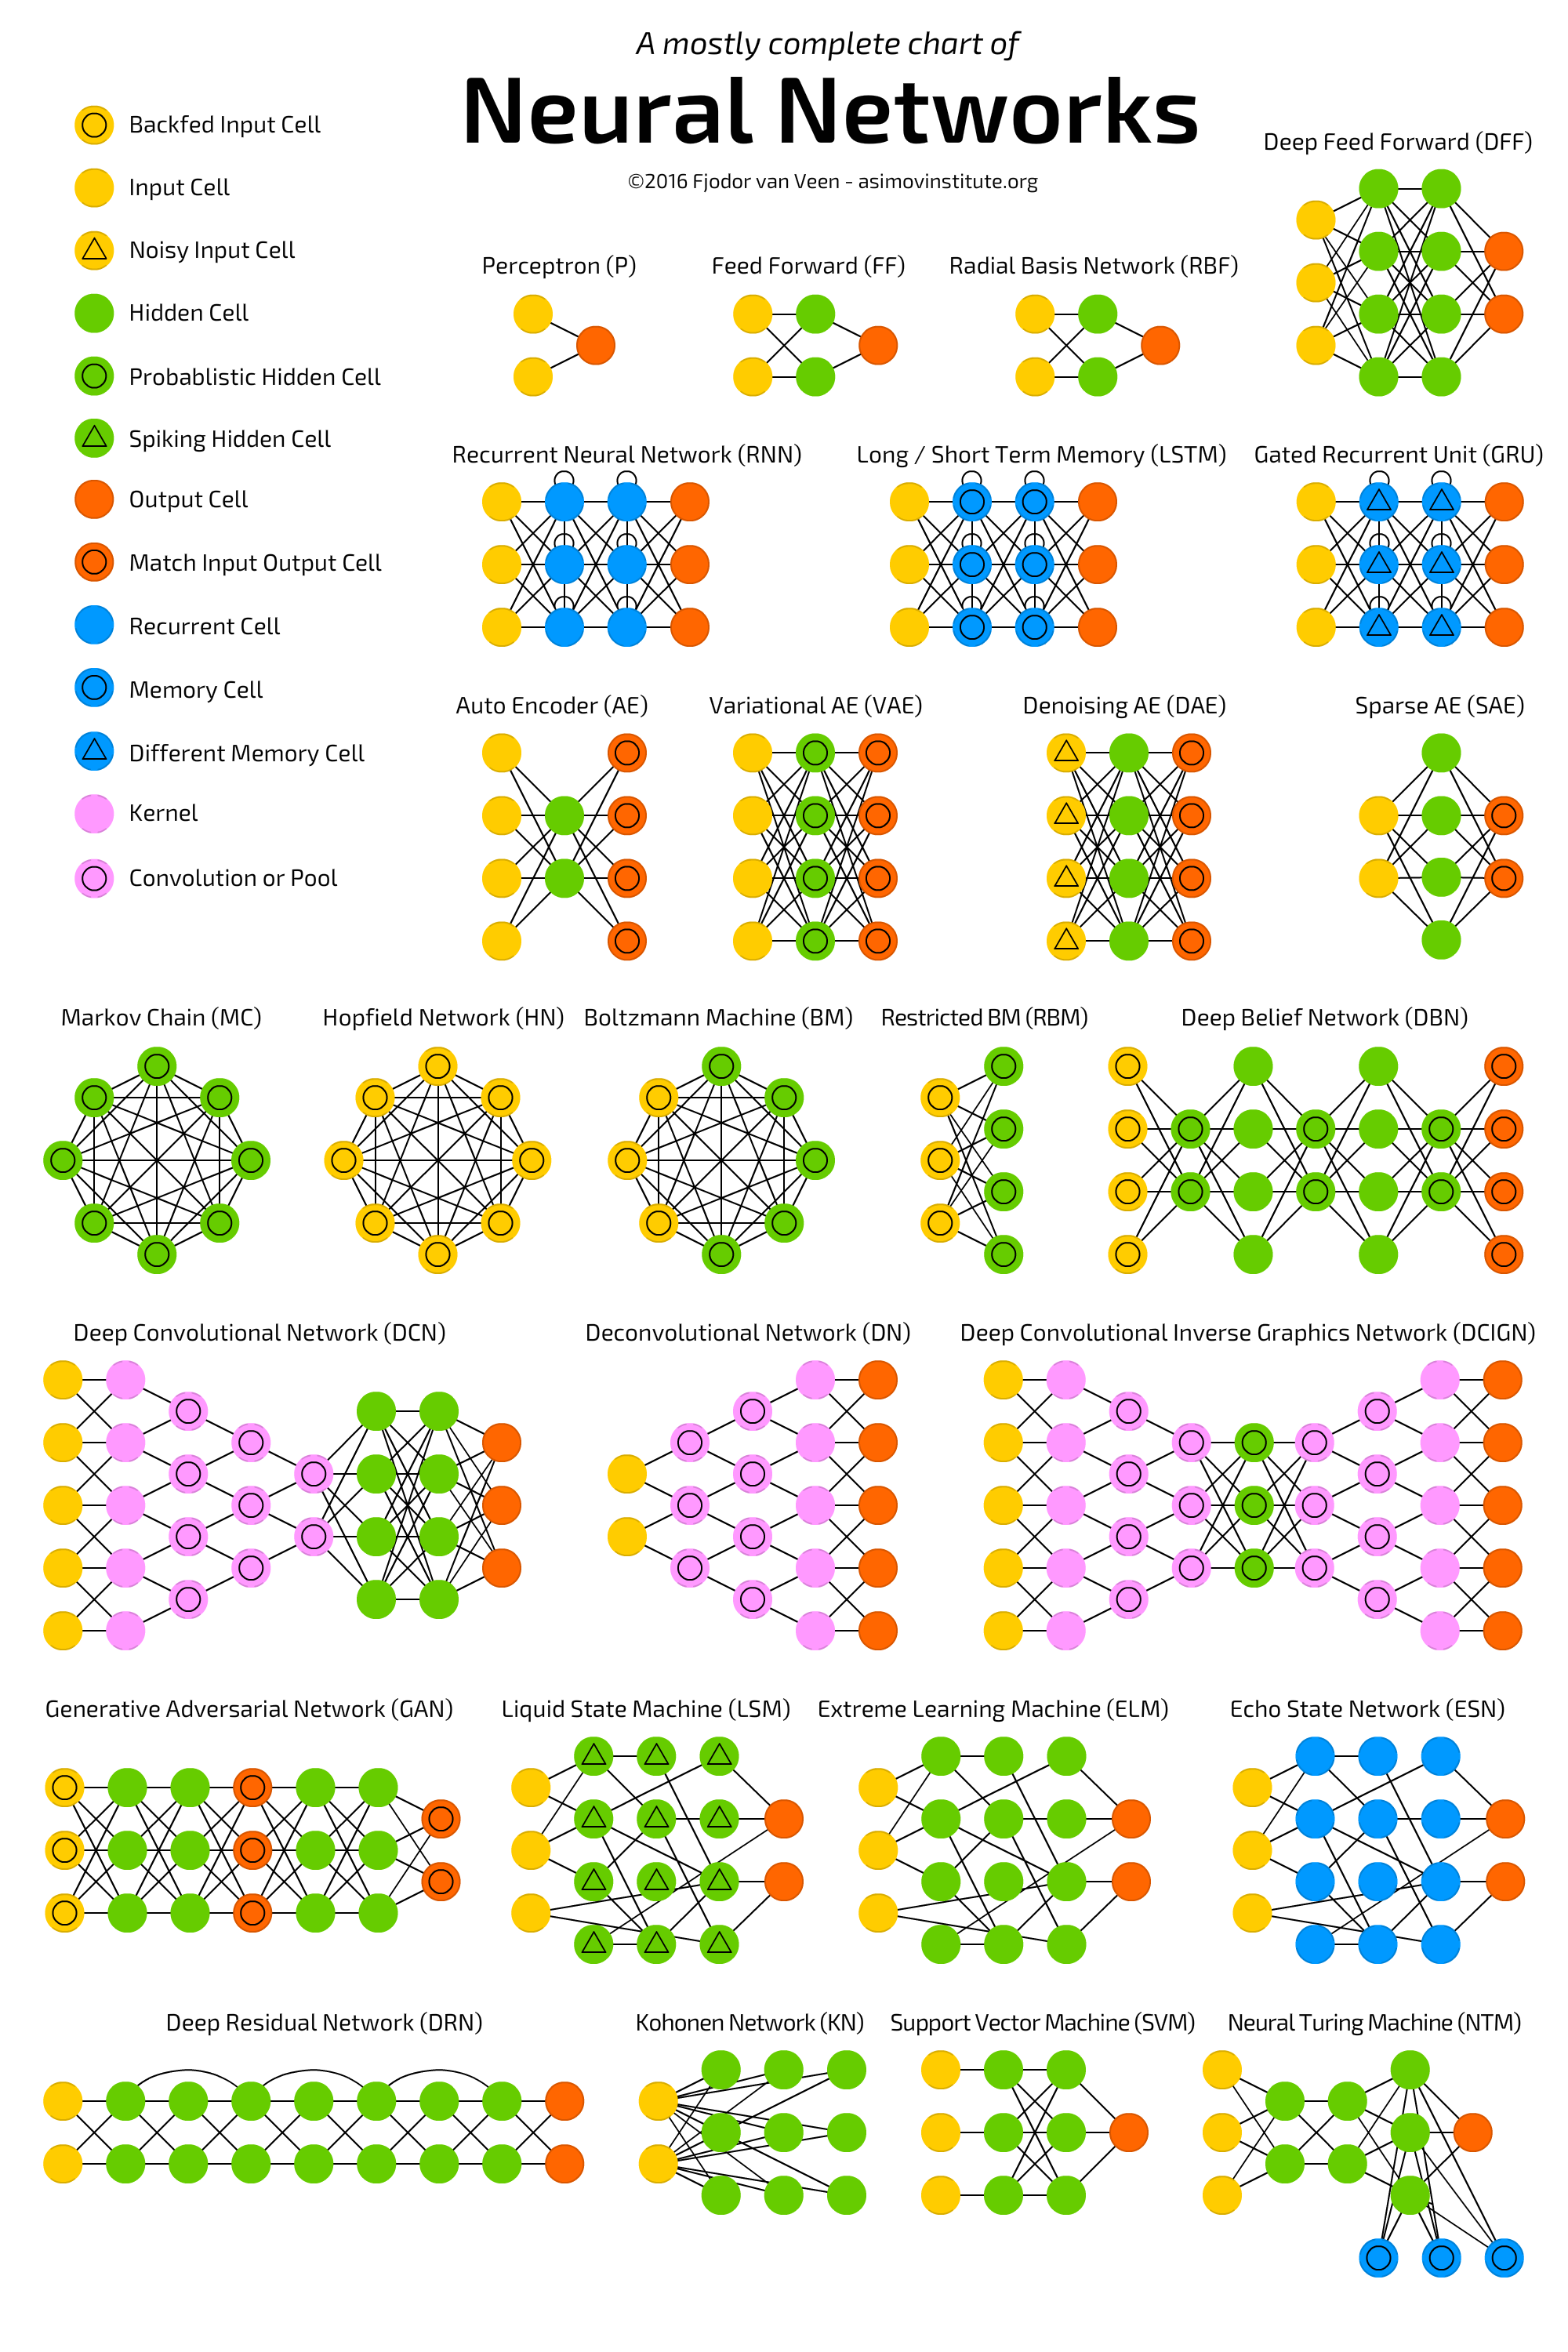

### Número de neurônios na camada de saída

- Classificação binária $\rightarrow$ Um neurônio
    - Domínio de 0 a 1:
        - Saída $>0.5$ ou $1$ para classe positiva
        - Saída $<0.5$ ou $0$ para classe negativa
    - Domínio de -1 a 1:
        - Saída $>0$ ou $1$ para classe positiva
        - Saída $<0$ ou $-1$ para classe negativa
        
- Classificação multi-classe ou multi-rótulo (multi-labels) $\rightarrow$ Um neurônio para cada classe
    - Domínio de 0 a 1:
        - A saída de cada neurônio corresponde a probabilidade daquela classe ser verdadeira
        - A saída do neurônio correspondente a classe escolhida tem saída 1 e os demais neurônios tem saída 0
    - Domínio de -1 a 1:
        - A saída do neurônio correspondente a classe escolhida tem saída 1 e os demais neurônios tem saída -1

### Neurônio humano

 - Dentritos $\rightarrow$ Recebe informação de outros neurônios
 
 - Corpo celular $\rightarrow$ **"Processa"** a informação recebida dos dentritos
 
 - Axônio $\rightarrow$ **Propaga** a informação **para outros neurônios através das suas terminações**
 
 Segue o desenho abaixo (https://en.wikipedia.org/wiki/Artificial_neuron):
 
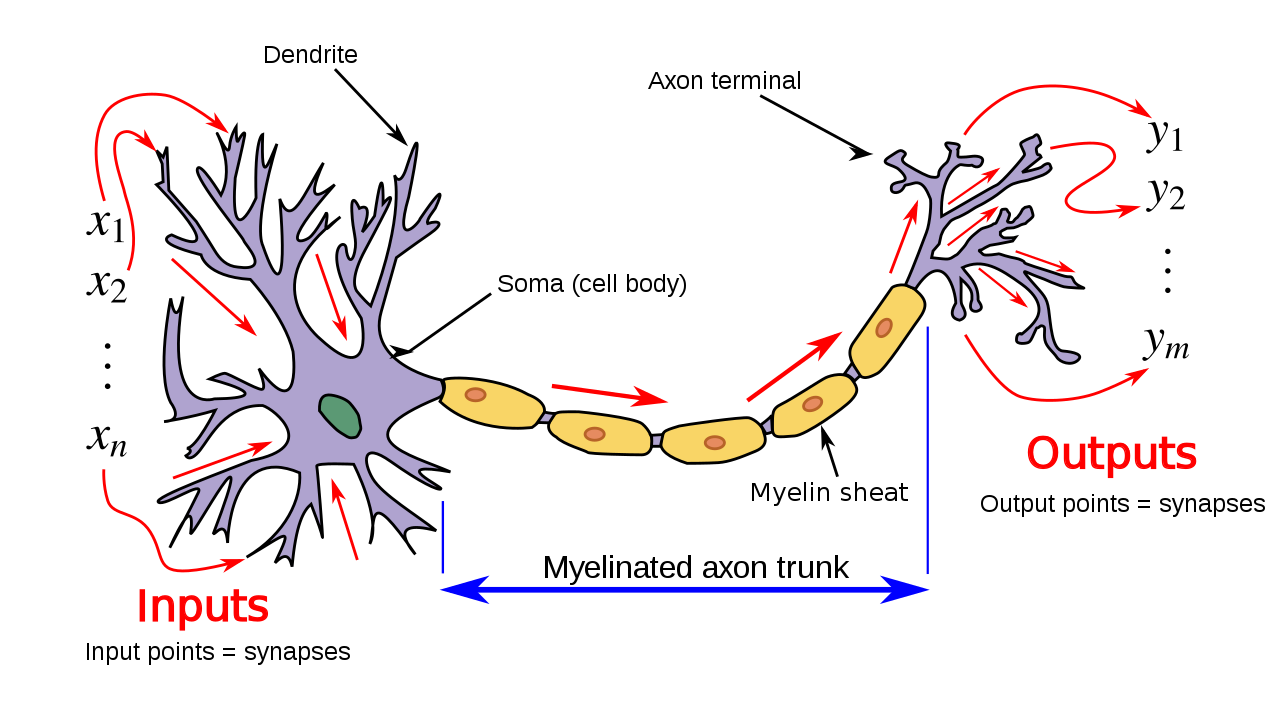

### Modelo do neurônio artificial clássico

Um neurônio artificial é composto por:

**Dentritos:**

- Sinais de entrada ($x_i$) $\rightarrow$ Recebe informações do ambiente ou outros neurônios

- Pesos sinápticos ($w_i$) $\rightarrow$ multiplica as entradas por pesos (Valores numéricos)

**Corpo celular:**

- Função soma ($\sum$) $\rightarrow$ Soma as entradas

- Limiar (Bias) ($-\theta$) $\rightarrow$ Limiar de ativação (Desloca a função de ativação pelo palno para ajustar aos dados de treinamento)

- Função de ativação ($g(.)$) $\rightarrow$ Função não linear que verifica se o estímulo recebido pelas entradas é transmitido
    - O Perceprtron usa a função degrau
    - Atualmente utiliza-se outras funções de ativação mais eficientes, como a ReLU ou Sigmoide e suas variações

**Axônio e suas terminações:**

- Sinal de saída ($y$) $\rightarrow$ Transmite o sinal para outros neurônios ou ambiente

Segue o exemplo da Wikipédia (https://pt.wikipedia.org/wiki/Perceptron_multicamadas):

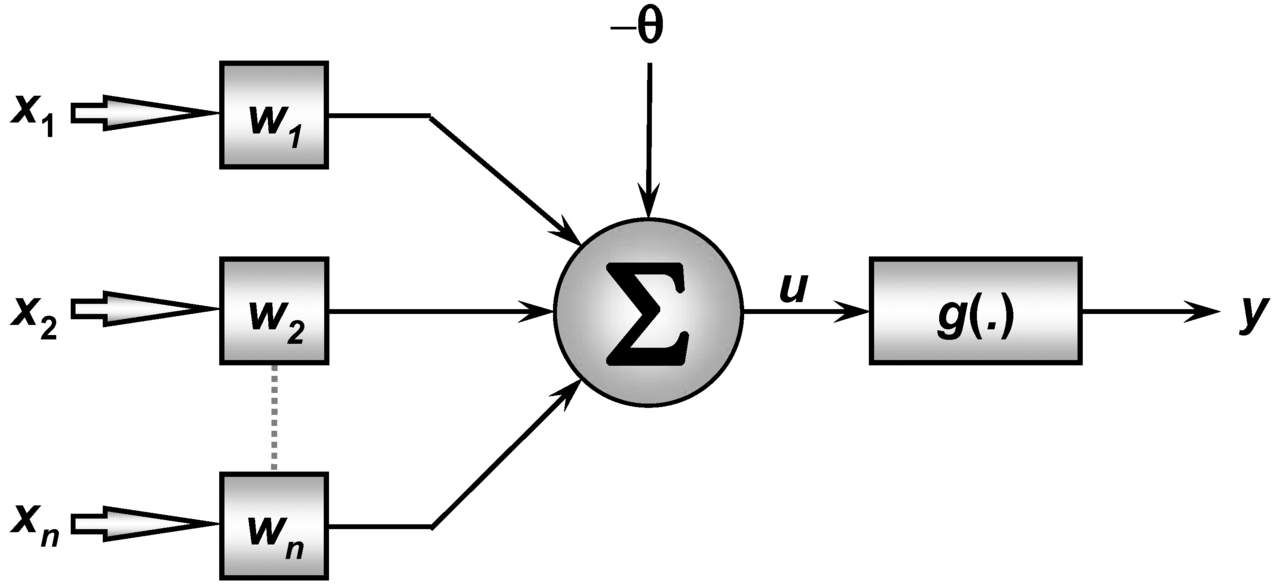

$$
u=\left(\sum_{i=1}^jx_i w_i\right) + \theta
$$

E a saída é:

$$
y=g(u)=g\left[\left(\sum_{i=1}^jx_i w_i\right) + \theta\right]
$$

### Aprendizado supervisionado para um neurônio

Consiste em computar os pesos ($w_1$, $w_2$, $\dots$, $w_j$) seguindo o algoritmo aqui:

1. Pesos são iniciados aleatoriamente
2. Cada sinal é processado, gerando uma saída
3. A saída é comparada com uma saída desejada
4. Os pesos do neurônio são ajustados na direção desejada (Direção de descida da derivada), de forma que minimizem a diferença da saída da rede e a saída desejada
5. Retorna ao passo 2 até que a diferença entre a saída da rede e a saída desejada seja menor que uma tolerância

#### Época (Epoch):

 - Cada repetição do algoritmo de aprendizado é chamada de época (Passo 2 ao 5)
 - As vezes delimitamos um número máximo de épocas

#### Algoritmo básico

1. Inicialização
    - Pesos definidos aleatoriamente
    - Epoch $n \leftarrow$ 0
2. Para cada estímulo de uma determinada época:
    - Calcular a função e o sinal de ativação $y(n)$
    - Se a função for menor que desejada:
        - Atualiza a Epoch: $n \leftarrow n + 1$
        - Atualiza os pesos
        - Repete o passo 2
    - Senão:
        - Finalize o aprendizado

- A atualização dos pesos é feita na direção oposta do gradiente (Direção de descida ou direção de minimização)

$$
w_i(n+1)=w_i(n)+\eta(d(n)-y(n))\cdot x_i(n)
$$

No qual:
 - $w(n+1)$ $\rightarrow$ Novo peso
 - $w(n)$ $\rightarrow$ Peso atual
 - $(d(n)-y(n))$ $\rightarrow$ Erro de classificação
 - $y(n)$ Saída gerada pela rede neural
 - $d(n)$ Saída do dataset
 - $\eta$ $\rightarrow$ Taxa de aprendizado ($0<\eta \leq 1$)
 - $x_i(n)$ $\rightarrow$ i-ésima entrada do neurônio

- Critério de parada $\rightarrow$ Existem vários critérios, como erro médio quadrático e seus variantes, cross-entropia, etc.

#### Taxa de aprendizado
    

Uma taxa de aprendizado maior:
- Permite um aprendizado mais rápido
- Torna a convergência mais instável (Provavelmente cai num ótimo local) 

### Funções de ativação

Existem duas categorias de funções de ativação:

- A Sigmoide e suas variantes
- A ReLU e suas variantes

A figura demonstra essas funções:

https://www.researchgate.net/figure/Various-forms-of-non-linear-activation-functions-Figure-adopted-from-Caffe-Tutorial_fig3_315667264

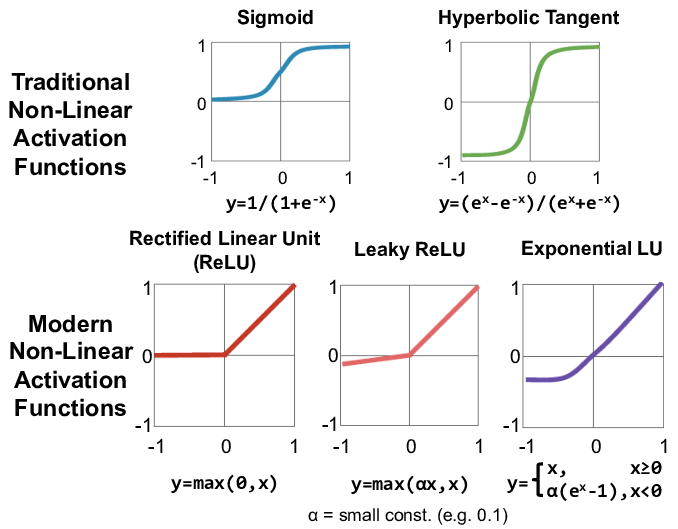

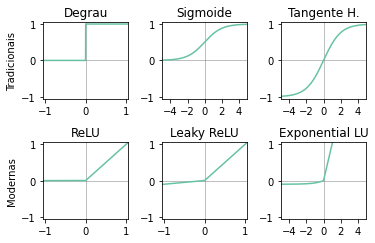

In [340]:
fig, axs = plt.subplots(2,3, figsize=setSize(1,0.66))

def step(x):
    x[x<0]=0
    x[x>0]=1
    return x

sigmoid = lambda x: 1/(1+np.exp(-x))
tangent = lambda x: 2*1/(1+np.exp(-x))-1

def reLU(x):
    x[x<0]=0
    return x

def l_reLU(x, alpha = 0.1):
    x[x<0]=alpha*x[x<0]
    return x

def e_reLU(x, alpha = 0.1):
    x[x<0]=alpha*(np.exp(x[x<0])-1)
    return x

fun = [step, sigmoid, tangent, reLU, l_reLU, e_reLU]
fun_name = ['Degrau', 'Sigmoide', 'Tangente H.', 'ReLU', 'Leaky ReLU', 'Exponential LU']


t = np.linspace(-5.1,5.1,1000)
for ax, f, name, eq in zip(axs.flat, fun, fun_name, fun_eq):
    ax.plot(np.linspace(-5.5,5.5,10000),f(np.linspace(-5.5,5.5,10000)))
    ax.set_title(name)
    lim = 5 if name == 'Sigmoide' or name == 'Tangente' else 1.1
    if name == 'Sigmoide' or name == 'Tangente H.' or name == 'Exponential LU':
        lim = 5
        ticks = np.linspace(-4,4,5,dtype=int)
    else:
        lim = 1.05
        ticks = np.linspace(-1,1,3,dtype=int)
    ax.set_xticks(ticks)
    ax.set_xlim(-lim,lim)
    
    ax.set_yticks(np.arange(-1,2))
    ax.axhline(y=0, color = 'gray',lw=0.5,zorder=-1)
    ax.axvline(x=0, color = 'gray',lw=0.5,zorder=-2)
    ax.set_ylim(-1.05,1.05)
axs[0,0].set_ylabel('Tradicionais')
axs[1,0].set_ylabel('Modernas')
fig.tight_layout()
fig.savefig('outputs/funcoes_ativacao.svg')

#### Sigmoide e suas variantes

**Função:**

A sigmoide logística é definida por:

$$
g_s(u)=\frac{1}{1+e^{-au}}
$$

**Derivada:**

A sua derivada é dada por:

$$
g_s'(u)=g_s(u)(1-g_s(u))
$$

- São funções de ativação não lineares tradicionais

- É uma função diferenciável que varia entre 0 e 1 e tem um comportamento linear (Suave) próximo a origem. 

- É possível mudara inclinação da região linear de sigmoide variando o valor do parâmetro $a$ na equação acima.

- Quando $a\rightarrow \infty$ a função sigmoide resulta na função degrau

**Tanh:**

A função sigmoide representa um valor entre 0 e 1, quando for necessário valores negativos pode-se utilizar a sua variante tangente hiperbólica, que é nada mais nada menos que a **função sigmoide logística rescalonada**.

$$
g_t(u)=\text{tanh}(u)=2g_s(2u)-1=\frac{e^x-e^{-x}}{e^x+e^{-x}}
$$

**Softmax:**

Além disso, existe a função **softmax** que é utilizada em redes neurais com múltiplas saídas.

$$
g_s(u)_i=\frac{e^{u_i}}{\sum_{j=1}^Ke^{u_j}}
$$

Segue o exemplo abaixo:

In [395]:
import numpy as np
import matplotlib.pyplot as plt

# Definindo a entrada
X = np.arange(-10, 10, 0.25)
Y = np.arange(-10, 10, 0.25)
X, Y = np.meshgrid(X, Y)

#Softmax
Z = [(np.exp(X)/ (np.exp(X)+ np.exp(Y))),(np.exp(Y)/ (np.exp(X)+ np.exp(Y)))]

fig, axs = plt.subplots(2,1,subplot_kw={'projection':'3d'},figsize=setSize(0.5,2))

xticks = np.arange(-10,10.1,5)
zticks = np.arange(0,1.01,0.5)
for i, ax in enumerate(axs):
    surf=ax.plot_surface(X,Y,Z[i],cmap='cividis')
    ax.set_zlabel(fr'$f_{{{i+1}}}(x)$')
    ax.set_zticks(zticks)
    ax.set_xticks(xticks)
    ax.set_yticks(xticks)
    labels =[item.get_text() for item in ax.get_xticklabels()]
    #ax.grid(False)
    ax.set_xticklabels(['']*int(len(labels)/2)+['$x_{1}$']+['']*int(len(labels)/2))
    ax.set_yticklabels(['']*int(len(labels)/2)+['$x_{2}$']+['']*int(len(labels)/2))
axs[0].set_title('Softmax')
#fig.suptitle('Softmax de duas saídas',fontsize='x-large')
#fig.colorbar(surf, shrink=0.5, aspect=20)
fig.savefig('outputs/softmax.svg')

NameError: name 'setSize' is not defined

Segue abaixo um exemplo numérico com um vetor de 6 entradas que resulta em 6 saídas:

In [15]:
import numpy as np
import scipy as sci
from scipy import signal
import matplotlib.pyplot as plt

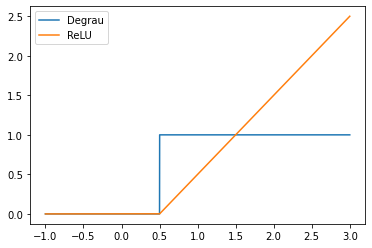

In [28]:
t = np.linspace(-1,3,10000)

w_b = 0.5

def relu(x):
    x[x<0] = 0
    return x

step = np.heaviside(t-w_b,0)


plt.plot(t,step, label='Degrau');
plt.plot(t,relu(t-w_b), label = 'ReLU');
plt.legend();

In [5]:
x = np.array([-1,0,0.2,1,3,10])

for u, x in zip(sci.special.softmax(x),x):
    print(f'u({x:4})={u:6.2%}')

print(f'A soma das saídas é: {sci.special.softmax(x):.1%}')

u(-1.0)= 0.00%
u( 0.0)= 0.00%
u( 0.2)= 0.01%
u( 1.0)= 0.01%
u( 3.0)= 0.09%
u(10.0)=99.88%
A soma das saídas é: 100.0%


A função softmax tem:

- $K$ entradas e $K$ saídas
- A soma das saídas é sempre igual a 1 (Na figura acima um gráfico é complementar ao outro)
- É uma sigmoide generalizada para $K$ dimensões
- Suas saídas representam a probabilidade de cada classe dada as entradas

**Problema da derivada em redes profundas (Com muitas camadas):**

- O Gradiente da função sigmoide sempre resulta em um valor menor que 1. 

- Em uma rede com muitas camadas a multiplicação dos gradientes das diferentes camadas vai resultar num valor muito pequeno, próximo de zero.



#### ReLU e suas variantes

A ReLU é recomendada para as camadas ocultas das redes neurais modernas e profundas (Com muitas camadas). Sua equação é dada por:

**Função:**

$$
g(u)=\text{max}(0,u)
$$

**Derivada:**

A derivada da ReLU é o degrau unitário

**Vantagens:**

As vantagens da ReLU em relação as funções tradicionais são:

- Computacionalmente mais eficiente

- Pode-se utilizar matrizes esparças (Neurônios inativos tem valor nulo, portanto o algoritmo de treino é mais eficiente ao usar matrizes esparças)

- Comportamento linear (Com exceção da origem)

- A derivada é sempre 1 na região ativa, portanto, é adequada para redes profundas.

**Problema do neurônio morto:**

Em valores menores que zero o gradiente da ReLU é nulo. 

No algoritmo do Gradiente Descentente aprendizado pode estacionar. 

Para resolver este problema pode-se utilizar as variantes do ReLU, como a Leakly ReLU, que tem derivadas pequenas, mas não nulas para valores menor quer zero.

Mais informações:

https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/

### Funções de erro (Loss Function)

https://towardsdatascience.com/deep-learning-which-loss-and-activation-functions-should-i-use-ac02f1c56aa8

#### Erro quadrático médio (MSE) e variantes

O erro quadrático médio (MSE) é uma função geral que pode ser utilizado em qualquer caso. Geralmente é utilizado em problemas de regressão onde a distância entre os valores são quantitativas.

$$
J=\text{MSE}=\frac{1}{n}\sum_{i=1}^n(y-\hat{y})^2
$$

Segue a imagem abaixo:
https://towardsdatascience.com/deep-learning-which-loss-and-activation-functions-should-i-use-ac02f1c56aa8

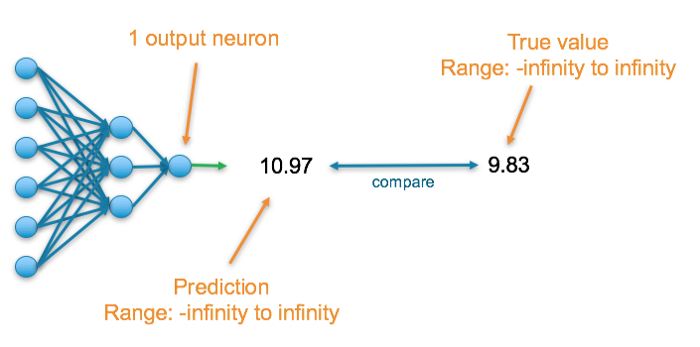

onde $\hat{y}$ é o valor predito e $y$ é o valor verdadeiro.

Existem outras variantes como:

- Erro absoluto médio
- Erro absoluto máximo
- Erro quadrático máximo
- Etc

#### Entropia binária cruzada

- Usado para **datasets com valor de saída binário (0 ou 1)**
- Em inglês **Binary Cross Entropy**.
- Compara a distribuição de probabilidades $p$ e $1-p$
- Deve ser aplicado em conjunto com a função tangente ou sigmoide

Segue a imagem abaixo:
https://towardsdatascience.com/deep-learning-which-loss-and-activation-functions-should-i-use-ac02f1c56aa8

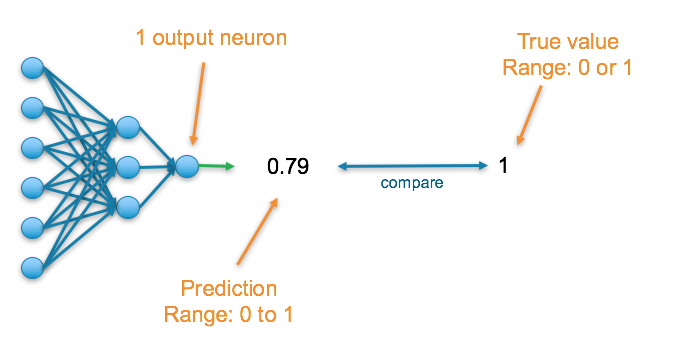

$$
J=\text{BinaryCrossEntropy}=-[y\log(\hat{y})+(1-y)\log(1-\hat{y})]
$$

- Se o sistema estiver puro (Probabilidade: $y=1$ e $\hat{y}\approx1$) a entropia cruzada é aproximadamente nula
- Se o sistema estiver totalmente desordenado (Probabilidade: $y=1$ e $\hat{y}\approx0$) a entropia cruzada tende ao infinito

Ver o exemplo abaixo:

In [90]:
import numpy as np
y=[1,1  ,1  ,1  , 1,0,0  ,0  ,0  ,0]
ŷ=[1,0.9,0.5,0.1, 0,0,0.1,0.5,0.9,1]
eps=1e-12
print('+--------+-----------+------------------+')
print('|Real (y)|Predito (ŷ)|BinaryCrossEntropy|')
print('+--------+-----------+------------------+')
for i in range(len(y)):
    e = eps if (ŷ[i]<=eps or ŷ[i]>=1-eps) else 0
    BinaryCrossEntropy = np.abs(np.round(-(y[i]*np.log(ŷ[i]+e)+(1-y[i])*np.log(1-ŷ[i]+e)),11))
    print(f'|{y[i]:8.1f}|{ŷ[i]:11.1f}|{BinaryCrossEntropy if BinaryCrossEntropy<10 else np.infty:18.2f}|')
print('+--------+-----------+------------------+')

+--------+-----------+------------------+
|Real (y)|Predito (ŷ)|BinaryCrossEntropy|
+--------+-----------+------------------+
|     1.0|        1.0|              0.00|
|     1.0|        0.9|              0.11|
|     1.0|        0.5|              0.69|
|     1.0|        0.1|              2.30|
|     1.0|        0.0|               inf|
|     0.0|        0.0|              0.00|
|     0.0|        0.1|              0.11|
|     0.0|        0.5|              0.69|
|     0.0|        0.9|              2.30|
|     0.0|        1.0|               inf|
+--------+-----------+------------------+


#### Entropia Categórica cruzada

É a generalização da Entropia binária cruzada para múltiplas classes:

- Empregada com a normalização softmax na saída
- A saída do dataset deve está na representação **one-hot**
- Quantifica a diferença entre duas distribuições de probabilidade

Segue a imagem abaixo: https://towardsdatascience.com/deep-learning-which-loss-and-activation-functions-should-i-use-ac02f1c56aa8

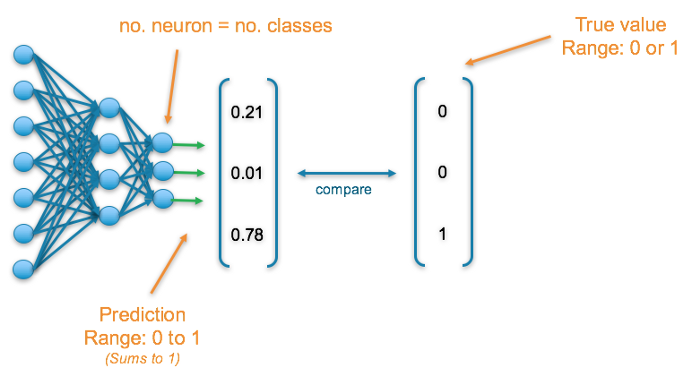

$$
J=\text{CategoricalCrossEntropy}=-\sum_{i=1}^My_i\log(\hat{y}_i)
$$

onde $M$ é o número de classes $y$ é o valor real e $\hat{y}$ é o valor predito.

### Otimizadores

Os otimizadores tentam encontrar **o valor mínimo**, ou valor ótimo, da **função de erro**. 

As **variáveis** (ou parâmetros) da função custo são os **pesos sinápticos** dos neurônios em todas as camadas.

Existem diversos métodos aplicados no contexto de treinamento de redes neurais. Alguns deles serão apresentados abaixo.

https://towardsdatascience.com/batch-mini-batch-stochastic-gradient-descent-7a62ecba642a

#### Gradiente descendente

O gradiente descendente é uma família de algorítmos que tenta minimizar uma determinada função.

Em resumo o algorítmo faz uso de duas etapas:

1. Calcula o gradiente (Primeira derivada no ponto) de uma função.
2. Move em sentindo contrário ao gradiente (Inclinação crescente).

A figura abaixo demonstra o funcionamento do gradiente descendente (https://towardsdatascience.com/batch-mini-batch-stochastic-gradient-descent-7a62ecba642a):

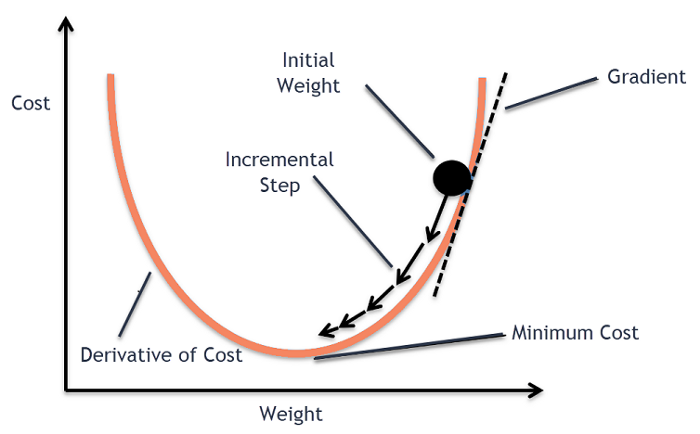

##### BatchGradientDescendent

**Características:**
- Leva em consideração todos os dados do dataset para no processo de otimização.
- A otimização leva apenas um único passo.
- Utiliza a **média dos gradientes** de todos os exemplos.
- Tem bom desempenho em funções suaves e convexas, como o MSE.
- Pode ser utilizado em datasets pequenos.

A imagem abaixo ilustra um treino com o GradienteDescendente
(https://towardsdatascience.com/batch-mini-batch-stochastic-gradient-descent-7a62ecba642a):

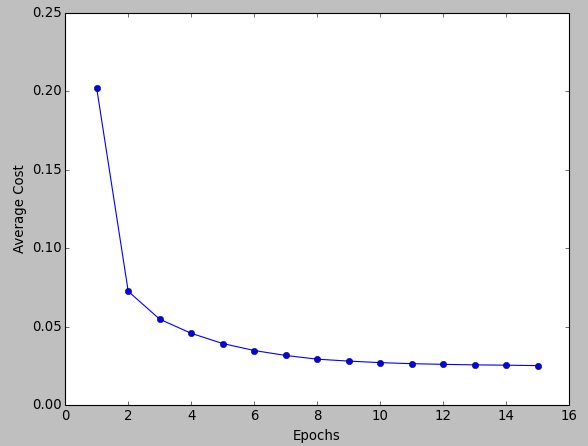

**Equação de atualização:**
$$
    \theta=\theta-\eta\cdot\nabla_\theta J(\theta)
$$

onde $\nabla_\theta J(\theta)$ é o gradiente calculado considerando todas as amostras.

**Considerações:**
- Utilizar todos os dados de uma única vez torna o processo mais suave, mas pode utilizar mais memória.
- Se o dataset for enorme o algorítimo deve calcular o gradiente de todos os dados de uma única vez.

##### StochasticGradientDescendent (SGD)

**Algoritmo:**
Considera apenas um exemplo por vez, seguindo os seguintes passos:
1. Pega um exemplo
2. Alimenta na rede neural
3. Calcula o gradiente
4. Usa o gradiente calculado para atualizar os pesos
5. Repete os passos 1-4 para todos os exemplos do dataset

**Equação:**
$$
\theta=\theta-\eta\cdot\nabla_\theta J(\theta,x^{(i)},y^{(i)})
$$

onde $\nabla_\theta J(\theta,x^{(i)},y^{(i)})$ é o gradiente do i-ésimo exemplo.

**Considerações:**
- É um bom algoritmo para datasets grandes, pois os parâmetros são atualizados com mais frequência
- O custo irá flutuar em relação aos exemplos, pois são exemplos diferentes.
- Nunca irá achar o mínimo, mas flutuará em relação a ele.


Foto (https://towardsdatascience.com/batch-mini-batch-stochastic-gradient-descent-7a62ecba642a):

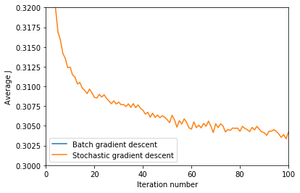

##### MiniBatchGradientDescendent

**Problema:**
- BatchGradientDescendent resulta em curvas de aprendizado suaves
- SGD converge mais rápido para datasets grandes
- SGD é mais lento pois utiliza apenas um exemplo por vez, portanto não há vetorização

**Solução:**
- Nem o dataset de uma única vez, nem um único exemplo para calculo do gradiente
- MiniBatchGradientDescendent utiliza o meio termo combinando os dois métodos anteriores

**Algoritmo:**
1. Pegue um mini-batch
2. Alimente na rede neural
3. Calcule o gradiente do mini-batch
4. Use a média do gradiente calculado para atualizar os pesos
5. Repita os passos de 1 a 4

**Considerações:**

- Assim como SGD há um decrescimento flutuante e o mínimo real não é alcançado.
- Como utilizamos um grupo de exemplos, o cálculo pode ser vetorizado, facilitando o cálculo com processamento parelelo.


Foto (https://towardsdatascience.com/batch-mini-batch-stochastic-gradient-descent-7a62ecba642a):

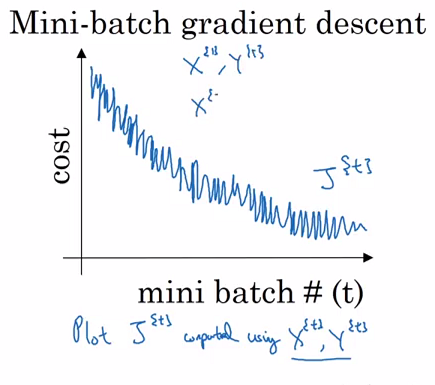

**Resumo:**

https://towardsdatascience.com/deep-learning-optimizers-436171c9e23f

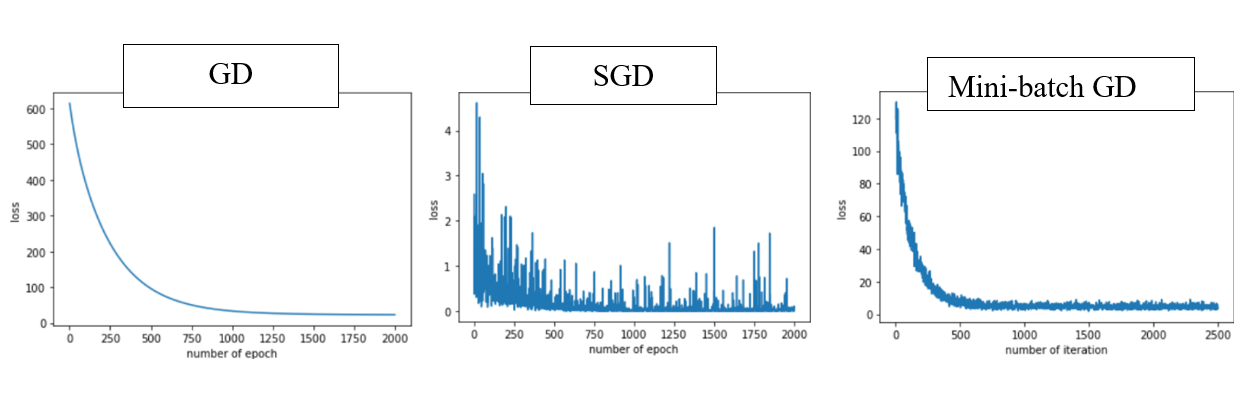

#### Outros otimizadores

**Considerações:**
- Enquanto o **gradiente descendente** tem uma **taxa de aprendizado fixa**.
- Outros otimizadores podem utilizar variadas técnicas para variar a taxa de aprendizado, otimizando a velocidade e a capacidade de busca.
- Estes algoritmos são apenas uma extensão do gradiente descentente, por isso o uso de mini-batch pode ser incluso.

Segue alguns métodos:

**SGD com momento:**

- O problema do SGD é a dificuldade de encontrar o mínimo, devido a sua oscilação
- A ideia é utilizar o momento para diminuir a tendência de oscilação
- Com o momento a derivada atual irá depender parcialmente da derivada anterior

$$
\theta_t=\theta_{t-1}-\eta\hat{g}_t
$$

onde $\hat{g}_t$ é a derivada com momento:

$$
\hat{g}_t=\beta\hat{g}_{t-1}+(1-\beta)\nabla_\theta J
$$

e $\beta$ é a constante de inércia do algoritmo.

A figura abaixo compara o SGD com e sem momento (https://towardsdatascience.com/deep-learning-optimizers-436171c9e23f):

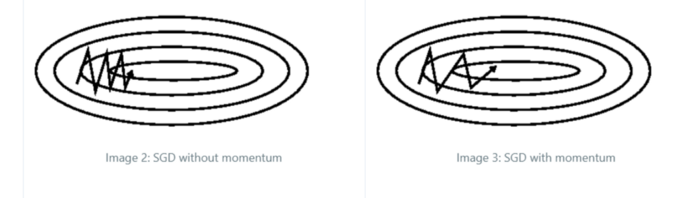


**Adagrad** $\rightarrow$ Taxa de aprendizado diminui de acordo com o parâmetro $G_t$
$$
\theta_{t+1}=\theta_{t}-\hat{\eta}\cdot \nabla_\theta J
$$

onde $g_t$ é o gradiente e $\hat{\eta}$ é a taxa de aprendizado adaptativa, definida por:

$$
\hat{\eta}=\frac{\eta}{\sqrt{G_t}+\epsilon}
$$

no qual $G_t$ é a soma dos gradientes ao quadrado dos passos anteriores:

$$
G_t=\sum_{i=1}^{t}(\nabla_\theta J)_t
$$

Como o gradiente tende a decrescer a medida que as iterações avançam. O valor de $G_t$ tende a aumentar e $\hat{\eta}$ tende a diminuir.

**Adadelta:**

- No Adagrad há um decrescimento exponencial, pois $G_t$ cresce exponencialmente. 
- O Adadelta utiliza uma média ponderada dos gradientes anteriores para o valor de $G_t$

Onde:

$$
\theta_{t+1}=\theta_{t}-\hat{\eta}\cdot (\nabla_\theta J)_t
$$

$$
\hat{\eta}=\frac{\eta}{\sqrt{G_t}+\epsilon}
$$

$$
G_t=\beta G_{t-1}+(1-\beta)(\nabla_\theta J)_{t-1}^2
$$

onde $\beta$ é a constante de ponderação com valor entre 0.9 e 0.95.

Para entender o $\beta$ ver o vídeo: https://www.youtube.com/watch?v=lAq96T8FkTw&t=257s

**Adam:** 

Adam combina o **conceito de momento** com o conceito de **taxa de aprendizado adaptativa** do Adadelta.

Média ponderada exponencial dos gradientes anteriores:

$$
\hat{G}_t=\frac{G_t}{1-(\beta_1)^t}
$$

com:

$$
G_t=\beta_1 G_{t-1}+(1-\beta_1)(\nabla_\theta J)_{t-1}
$$

Média ponderada dos grandientes anteriores ao quadrado:

$$
\hat{g}_t=\frac{g_t}{1-(\beta_2)^t}
$$

com:

$$
g_t=\beta_2 G_{t-1}+(1-\beta_2)(\nabla_\theta J)_{t-1}^2
$$

A inércia adaptativa é dada por:

$$
\hat{\eta}=\frac{\eta}{\sqrt{\hat{G}_t}+\epsilon}
$$


E a atualização:


$$
\theta_{t+1}=\theta_{t}-\hat{\eta}\cdot \hat{g}_t
$$

Onde $\beta_1$ e $\beta_2$ são constantes relacionadas com a inércia do gradiente e a inércia da taxa de aprendizado adaptativa.

As vantagens do Adam são:

- Eficiente computacionalmente
- Baixo consumo de memória
- Apropriado para problema com grande ruído ou gradientes esparsos (derivada nula)
- Requer poucos ajustes

Artigo original:

https://arxiv.org/pdf/1412.6980.pdf

**Comparativo:**

Segue abaixo imagens comparativas de cada método (https://ruder.io/optimizing-gradient-descent/):

![image.png](https://ruder.io/content/images/2016/09/contours_evaluation_optimizers.gif)

![image.png](https://ruder.io/content/images/2016/09/saddle_point_evaluation_optimizers.gif)

## Perceptron

A rede neural mais simples é a Perceptron que é composta por apenas um neurônio artificial.

### Limitações do Perceptron

É limitado a problemas apenas linearmente separáveis

Por exemplo, a função OR é linearmente separável, portanto pode ser encontrada com o Perceptron, mas a função XOR não é linearmente separável.

https://seongjuhong.com/2019-12-08pm-multi-layer-perceptron/

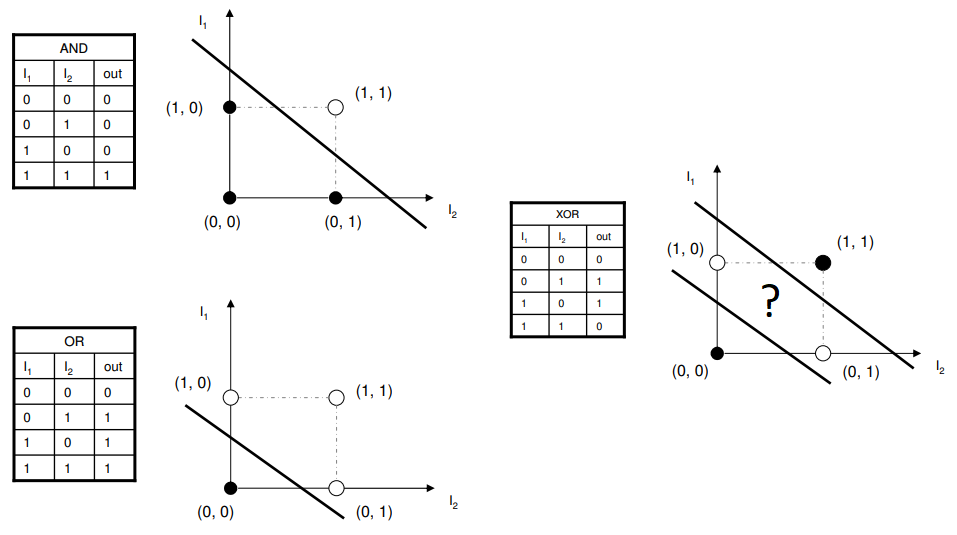

**Solução:** 

- Mutilayer Perceptron, Feed Forward ou rede neural densa
- Neste caso, uma rede de duas camadas é o suficiente, pois só são necessários dois hiperplanos para fazer a separação

In [204]:
def setSize(width=1,height=None):
    """Seta o tamanho da figura evitando escala no LaTeX

    Paâmetros
    ----------
    width: float
            Fração da largura da página
    height: float, optional
            Fração da largura (Caso não seja colocado será utilizado a razão áurea)

    Retorna
    -------
    fig_dim: tuple
            Dimensão da figura em polegadas
    """
    # Largura da figura (em pt)
    latex_page_width=382 #Largura da página em pt (No latex - Usar o comando \the\linewidth)
    fig_width_pt = latex_page_width * width
    inches_per_pt = 1 / 72.27

    # Razão aurea
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    fig_width_in = fig_width_pt * inches_per_pt
    
    fig_height_in = height * fig_width_in if height else fig_width_in * golden_ratio

    fig_dim = (fig_width_in, fig_height_in)

    return fig_dim

In [205]:
import matplotlib.pyplot as plt
import numpy as np

In [208]:
params={'figure.dpi':72*2,
        'savefig.dpi':300,
        'figure.titlesize':'large',
        'figure.titleweight':'bold',
        'axes.prop_cycle': plt.cycler(color=                
                    plt.cm.get_cmap("Set2").colors[0:6]+
                    plt.cm.get_cmap("Accent").colors[6:7]+
                    plt.cm.get_cmap("Accent").colors[4:6])
       }
plt.rcParams.update(params)
#font = ImageFont.truetype("NotoSans-Regular.ttf", 12)

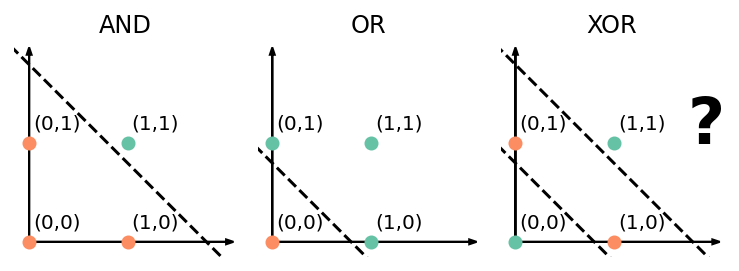

In [243]:
fig, axs = plt.subplots(1,3, figsize=setSize(1,0.4),sharey=True)

plots = dict()
plots['AND']=({'verdadeiro': np.array([[1,1]]), 'falso': np.array([[0,0],[0,1],[1,0]])})
plots['OR']=({'verdadeiro': np.array([[0,1],[1,0],[1,1]]), 'falso': np.array([[0,0]])})
plots['XOR']={'verdadeiro': np.array([[0,0],[1,1]]), 'falso': np.array([[0,1],[1,0]])}
coeff = dict()
f = lambda c, x: -x+c
coeff['AND'] = [1.8]
coeff['OR'] = [0.8]
coeff['XOR'] = [0.8,1.8]
t = np.linspace(-10,10,2)
lim = 2.1
for ax, fun in zip(axs.flat, plots):
    ax.arrow(0,0,0,lim-0.1-0.1,color='k',zorder=-1,head_width=0.05)
    ax.arrow(0,0,lim-0.1,0,color='k',zorder=-2,head_width=0.05)
    for case in plots[fun]:
        xs = plots[fun][case]
        ax.scatter(xs[:,0],xs[:,1], label = case)
        for x in xs:
            ax.annotate(f'({x[0]:n},{x[1]:n})',x, ha='left',va = 'bottom',
                        xytext=(2, 5),
                        textcoords='offset points'
                        )
    for b in coeff[fun]:
        ax.plot(t,f(b,t),'k--')
    ax.set_title(fun)
    ax.axis('off')
    #ax.set_xticks([])
    #ax.set_yticks([])
    ax.set_aspect('equal')
    ax.set_xlim(-0.15,lim)
    ax.set_ylim(-0.15,lim-0.1)
axs[-1].text(1.75,1,'?',fontweight='bold',fontsize=32)
fig.tight_layout()
fig.savefig('outputs/perceptron.svg')

## Multilayer Perceptron ou Feed Forward

- Arquitetura de redes neurais mais utilizadas em aprendizado supervisionado
- Possuem uma ou mais camadas ocultas
- Geralmente utiliza-se funções de ativação diferenciáveis como:
    - ReLU e suas variantes (A derivada da ReLU é a degrau)
    - Sigmóide logística e suas variantes (A sigmoide logística é uma aproximação diferenciável da função degrau)

Segue um exemplo abaixo (https://www.tibco.com/reference-center/what-is-a-neural-network):

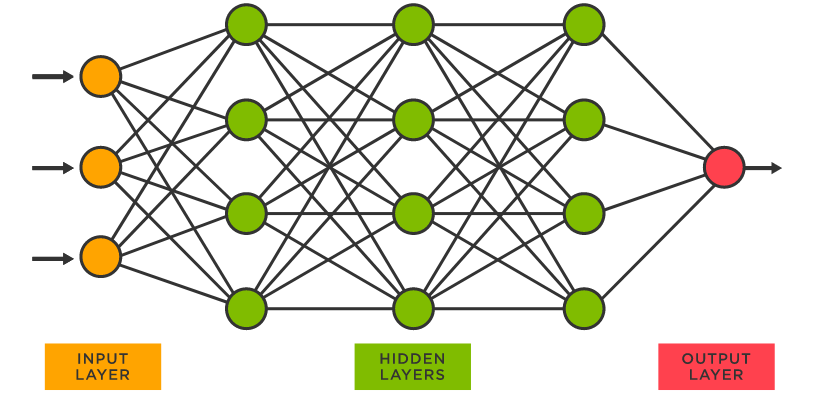

### Aprendizado: Backpropagation

- No algoritmo de treino básico considerava-se apenas um neurônio
- Neste caso o erro era computado apenas na saída
- Em uma rede neural densa há mais de uma camada, portanto é necessário utilizar um algoritmo de **retropropagação de erro** ou **backpropagation**.
- **Estima o erro das camadas internas com base no erro da camada de saída**

Em resumo o algoritmo apresenta duas fases:

- A fase direta / Propagação (Igual ao algoritmo simplificado)
- Retropropagação (Backpropagation)

O estágio de Backpropagation tem os seguintes passos:

- Avaliar o erro em cada camada
- Usa o erro do sinal para computar os gradientes
- Atualizar os parâmetros usando os gradientes com um algoritmo de otimização como o Gradiente descendente

A figura abaixo ilustra o processo:

https://vinodsblog.com/2019/02/17/deep-learning-backpropagation-algorithm-basics/

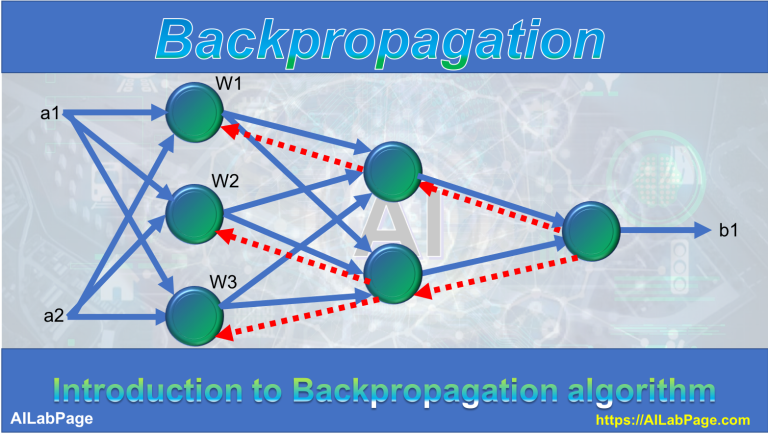

Para ler um pouco mais:

https://towardsdatascience.com/error-backpropagation-5394d33ff49b

### Vantagens e desvantagens

#### Desvantagens

- Muitos parâmetros (Convergência lenta e computacionalmente caro)
- Definição dos parâmetros experimental:
    - Número de camadas
    - Número de neurônios em cada camada
    - Taxa de aprendizado
    
    
#### Vantagens

- MLP de uma única camada oculta permite a aproximação de qualquer função contínua
- MLP de mais de uma camada oculta perte a aproximação de funções não contínuas
- Amplamente aceita na indústria e academia
- Muito utilizada em regressão

#### GPUs e TPUs

- Com o avanço da computação o treinamento das redes neurais são feitos de forma de tensores (Matrizes)
- GPUs permitem o cálculo de tensores de forma rápida
- TPUs é uma nova arquitetura criada pelo Google para trabalhar com tensores
    - TensorFlow é um pacote do Google que faz cálculos otimizados utilizando TPUs e GPUs

#### Simulador de redes neurais do Google

https://playground.tensorflow.org

# Etapa 1: Importando as bibliotecas necessárias

In [302]:
import numpy as np
import datetime
import tensorflow as tf
# Keras é uma biblioteca de aprendizado de máquinas (O Google imbutiu o keras no TensorFlow)
import matplotlib.pyplot as plt
from tensorflow import keras

Site oficial do fashion_mnist:

https://www.tensorflow.org/tutorials/keras/classification?hl=pt-br

Sobre o Keras:

https://pt.wikipedia.org/wiki/Keras

Sobre o TensorFlow:

https://pt.wikipedia.org/wiki/TensorFlow

TensorFlow vs Numpy:

https://zorahirbodvash.medium.com/numpy-vs-tensorflow-adf7ba0634a6

In [303]:
tf.__version__

'2.4.1'

# Etapa 2: Pré-processamento

## Carregando a base de dados:

In [304]:
# Carregando a base de dados (Este comando faz o download da base de dados)

[x_train, y_train], [x_test, y_test] = keras.datasets.fashion_mnist.load_data();

4423680/4422102 [==============================] - 2s 0us/step


## Verificando o tamanho da base de dados:

Mostrando a base de dados de treino:

In [305]:
print(x_train.shape)
# No total, são 60000 imagens de 28x28 pixes (Os valores estão na escala de 0 a 255)
# As escalas estão em escala de monocromática

(60000, 28, 28)


In [306]:
print(x_train[0].shape) # Cada imagem é uma imagem de 28 x 28 pixel

(28, 28)


In [307]:
y_train
# y mostra a classificação correspondente de cada item

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Mostrando a base de dados de teste:

In [308]:
print(x_test.shape)
# No total, são 10000 imagens de 28x28 pixes

(10000, 28, 28)


## Visualizando os primeiros itens da base de dados de treino

In [309]:
# Permitindo a plotagem inline
%matplotlib inline

Algumas considerações:
- As imagens estão em escala monocromática (Tem somente um canal)
    - Menor quantidade de memória
- As imagens são de 28x28 pixeis
    - Cada píxel é representado por um inteiro entre 0 e 255
- As imagens são representado pelo $x$
- A classificação das imagens são representadas pelo $y$
    - Varia de 0 a 9
    - Ver o título das imagens
    
 - Cada saída tem a seguinte configuração:
   - 0 Camistetas/Top (T-shirt/top)
   - 1 Calças (Trouser)
   - 2 Suéters (Pullover)
   - 3 Vestidos (Dress)
   - 4 Casacos (Coat)
   - 5 Sandálias (Sandal)
   - 6 Camisas (Shirt)
   - 7 Tênis (Sneaker)
   - 8 Bolsas (Bag)
   - 9 Botas (Ankle boot)

In [310]:
Labels = ('Camiseta',
          'Calça',
          'Suéter',
          'Vestido',
          'Casaco',
          'Sandália',
          'Camisa',
          'Tênis',
          'Bolsa',
          'Bota')

Mostrando a primeira imagem:

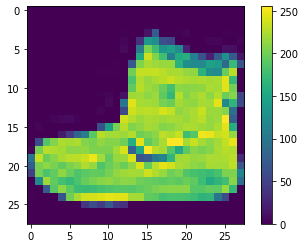

In [311]:
plt.figure();
plt.imshow(x_train[0]); #Carregando a primeira imagem
plt.colorbar();

Mostrando 36 itens aleatórios em escala preto e branco:

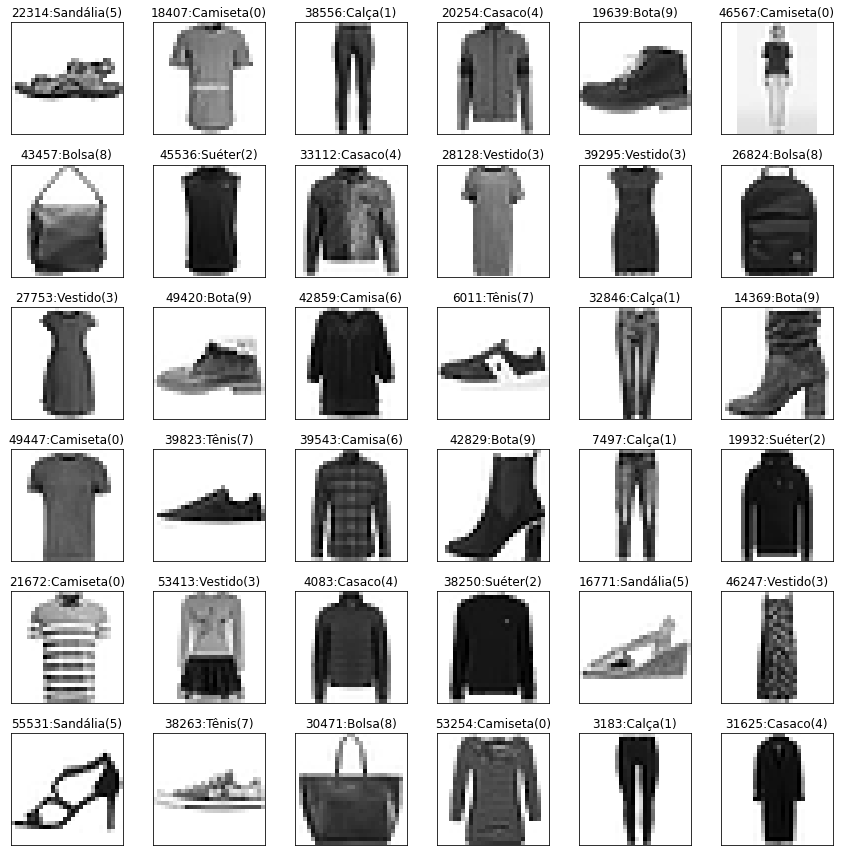

In [312]:
fig, ax = plt.subplots(6,6,figsize=(12,12),sharey=True,sharex=True)
# Gerar um índice aleatório de tamanho 36 (6x6)
random_i = np.random.randint(60000,size=36)

for j in range(6):
    for i in range(6):
        ax[i,j].imshow(x_train[random_i[6*i+j]],cmap=plt.cm.binary) #cmap=plt.cm.binary mostra a escala em preto e branco
        ax[i,j].set_title(f'{random_i[6*i+j]}:{Labels[y_train[random_i[6*i+j]]]}({y_train[random_i[6*i+j]]})')
        ax[i,j].set_yticks([])
        ax[i,j].set_xticks([])
plt.tight_layout()

## Normalizando as imagens

Os neurônios das redes neurais funcionam como produto escalar como mostra abaixo:

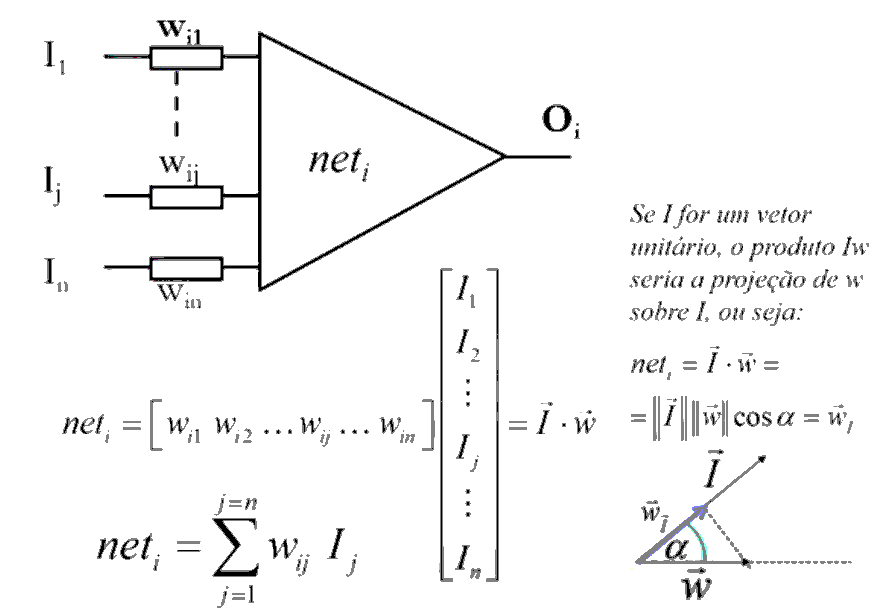

Muitas vezes os algoritmos calculam a projeção dos vetores utilizando o produto escalar. Neste caso é interessante normalizar, para que haja mais eficiência no processamento. 

Neste caso dividiremos a imagem por 255. Com isso cada imagem terá um pixel que irá variar entre 0 e 1

In [313]:
# Normalizando x_train (Dividindo por 255)
print(f'x_train: Antes da normalização: [min: {x_train.min()}, max: {x_train.max()}, médio: {x_train.mean()}]')
X_train = x_train/255.0
print(f'X_train: Depois da normalização: [min: {X_train.min()}, max: {X_train.max()}, médio: {X_train.mean()}]')

x_train: Antes da normalização: [min: 0, max: 255, médio: 72.94035223214286]
X_train: Depois da normalização: [min: 0.0, max: 1.0, médio: 0.2860405969887955]


In [314]:
print(f'Antes da normalização: [min: {x_test.min()}, max: {x_test.max()}, médio: {x_test.mean()}]')
X_test = x_test/255.0
print(f'Depois da normalização: [min: {X_test.min()}, max: {X_test.max()}, médio: {X_test.mean()}]')

Antes da normalização: [min: 0, max: 255, médio: 73.14656658163265]
Depois da normalização: [min: 0.0, max: 1.0, médio: 0.2868492807122849]


## Remodelando (reshaping) a base de dados

Como estamos trabalhando com uma rede neural densa, mudamos a dimensão das bases de dados para ficarem no formato de vetor:

In [315]:
# print(f'X_train: Antes do reshaping: {X_train.shape}')
# # Como a dimensão de cada imagem é 28x28, mudamos toda a base para o formato [-1 (todos os elementos) altura*largura (ou usando o método size)]
# X_train = X_train.reshape(-1,28*28)
# print(f'X_train: Depois do reshaping: {X_train.shape}')

In [316]:
# print(f'X_test: Antes do reshaping: {X_test.shape}')
# # Como a dimensão de cada imagem é 28x28, mudamos toda a base para o formato [-1 (todos os elementos) altura*largura (ou usando o método size)]
# X_test = X_test.reshape(-1,28*28)
# print(f'X_test: Depois do reshaping: {X_test.shape}')

# Etapa 3: Construção da rede neural

## Método 1: Básico (Tirado do curso)

Definimos um objeto do tipo Sequential (Sequência de camadas):

In [328]:
model = keras.models.Sequential()
print(model) # O modelo é do tipo sequencial

### Adicionando a camada de entrada

A primeira camada da rede (Camada de entrada), transforma o formato da imagem de um array de imagens de duas dimensões (28x28) em um array de uma dimensão. Para isso vamos usar uma camada do tipo `Flaten`.

Essa camada não tem parâmetro para aprender, só formata os dados. Parâmetros:

- `input_shape`: Formato da imagem (28,28)

In [329]:
model.add(keras.layers.Flatten(input_shape=(28,28)))

### Adicionando a primeira camada oculta densa (fully-coonected)

Camada densa indica que todos os neurônios das camadas adjacentes estão conectados entre si:

Parâmetros:
- número de neurônios $\rightarrow$ `units`: 128
    - A primeira camada oculta tem 128 neurônios (É a segunda camada do sistema)
- função de ativação $\rightarrow$ `activation`: `ReLU`

In [330]:
model.add(keras.layers.Dense(units=128,activation='relu'))

#### Adicionando o Dropout

Dropout é uma técnica de regularização na qual alguns neurônios da camda tem seu valor mudado para zero, ou seja, durante o treinamento esses neurônio não serão atualizados. Com isso, temos menos chances de correr o overfitting.

Explicação sobre Dropout:

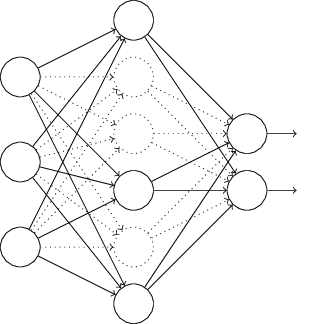

Depois treinamos com os neurônios intocados. Por fim tiramos uma média.

Para mais informações vê o link abaixo:

https://www.deeplearningbook.com.br/capitulo-23-como-funciona-o-dropout/

https://jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf

Dentro do `dropout` existe o parâmetro $p$, conhecido como `rate` no método `Dropout` que indica a probabilidade de ignorar uma fração aleatória durante o treinamento.

**Exemplo:**

Supondo que `rate=0.8` e uma camada com `50` unidades. Em média restarão `40` unidades de cada camada. 

Ao passar para a próxima camada, o valor $z$ vai usar apenas `40` neurônios/ativados $\rightarrow$ Daí, multiplica-se por `1/0.8` para manter o valor de `z` da próxima camada igual (em valor esperado) ao valor sem dropout.


Nosso caso será escolhido `rate=0.5` para a primeira camada interna

Recomendações:

- Do paper (JMLR, 2014) -> Probabilidade de 1/2 para camadas internas (Escondidas) com muitas unidades
- 0.8 ou 1.0 para obter features da camada visível
- 1.0 para neurônios das camadas finais

In [331]:
model.add(keras.layers.Dropout(rate=0.5)) #p=0.5 é a probabilidade de ignorar os nós e ativações correspondentes

### Adicionando a camada de saída

- units: Número de classes (10 na base de dados Fashion MNIST)
- função de ativação: softmax
    - Essa função de ativação dá a probabilidade de cada uma das categorias
    - Caso seja estejamos trabalhando com uma classificação binária podemos utilizar a função `sigmoid` na saída
    
> Sobre a função sigmoide:

A função sigmode é dada por:

$$
f(x)=\frac{1}{1+e^{-x}}
$$

É uma função suave e continuamente diferenciável. A maior vantagem sobre a função 

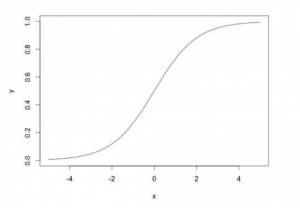


> Sobre a função softmax:

É uma generalização da função sigmoide para casos com múltiplas entradas.

As saídas da função softmax são:

$$
\sigma(z)_j=\frac{e^{z_j}}{\sum_{k=1}^K \text{ para } {j=1,\dots,K}}
$$

**Exemplo:**

Digamos, por exemplo, que temos as saídas como `[1.2, 0.9, 0.75]`, quando usamos a função softmax, obtemos `[0.42,0.31,0.27]`

A soma de todos os elementos da Softmax é sempre 1, ou 100%.

In [332]:
model.add(keras.layers.Dense(units=10,activation='softmax'))

# Etapa 4: Compilando o modelo

**O método `compile` vai preparar a rede neural para o treino.** É necessário compilar o modelo 

https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile


## Optimizer (Otimizador)

- Optimizer (otimizador): Adam

O otimizador é o método de otimização para encontrar os pesos. É um método de otimização estocástico proposto em 2015. E atualmente é um dos mais eficientes para esse fim com diversas vantagens em relação aos outros métodos.

O passo é:

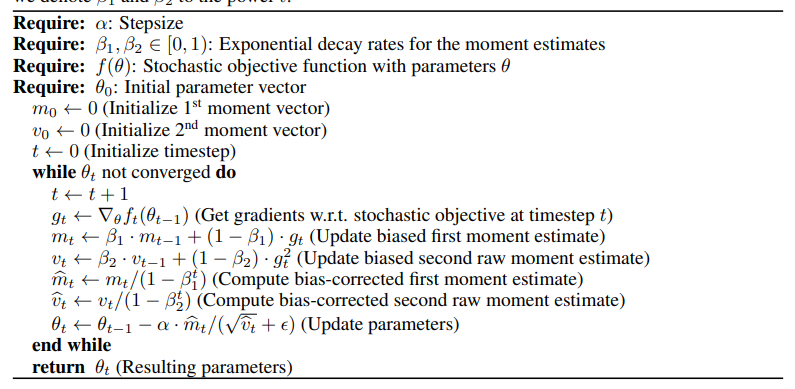

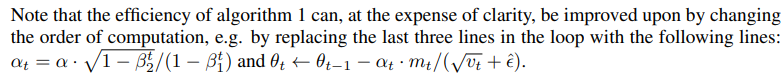


Onde:

- $\alpha$ $\rightarrow$ Tamanho do passo
- $\beta_1$ e $\beta_2$ $\in [0,1)$ $\rightarrow$ Decaimento exponecial do momento
- $\beta_1^t$ e $\beta_2^t$ $\beta$ elevado a t-ésima potência
- $g_t^2$ é o gradiente elevado ao quadrado (Multiplicação, elemento por elemento)

Segundo o artigo, valores bons são:
- $\alpha=0.001$
- $\beta_1=0.9$
- $\beta_2=0.999$
- $\epsilon=10^{-8}$

Os valores padrões são:

```python
tf.keras.optimizers.Adam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam', **kwargs
)
```

Mais sobre o otimizador:

https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/

https://arxiv.org/pdf/1412.6980.pdf

https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam

Outros métodos disponíveis:

> Adadelta: Adadelta

> Adagrad: Adagrad

> Adamax: Adamax

> Ftrl: FTRL

> Nadam: NAdam

> RMSprop: RMSprop

> SGD: Gradiente de descida (com momento) - Método estocástico

## Loss (Função de erro)

Mais informações estão aqui:

https://keras.io/api/losses/

https://keras.io/api/losses/probabilistic_losses/

Existem diversos métodos, esses são os mais utilizados:

### BinaryCrossentropy

Calcula a cross-entropia entre os valores verdadeiros (Reais) e os valores preditos.

A função de perda requer os seguintes argumentos:

- `y_true` $\rightarrow$ Binário (0 ou 1)
- `y_pred` $\rightarrow$ Ponto flutuante 
    - Usar `from_logits=True` se $y_\text{pred} \in (-\infty,+\infty)$ (Saída de uma função logística - `logit`)
    - Usar `from_logits=False` se $y_\text{pred} \in [0,1]$ (Probabilidade)
    - Recomenda-se `from_logits=True`

- Caso tenha mais de uma saída usar `CategoricalCrossentropy` $\rightarrow$ computa a entropia entre os valores verdadeiros (As labels verdadeiras) e as predições.

- Caso a saída seja binária usar `

- Loss (Função de erro): Sparse softmax (categorical crossentropy)

**Exemplo (`from_logists=True`):**

In [333]:
y_true = tf.constant([0, 1, 0, 0])
y_pred = tf.constant([-18.6, 0.51, 2.94, -12.8])
bce = tf.keras.losses.BinaryCrossentropy(from_logits=True)
bce(y_true, y_pred).numpy()

0.865458

**Exemplo (`from_logists=False` - Valor padrão):**

In [334]:
y_true = tf.constant([0, 1, 0, 0])
y_pred = tf.constant([[0.6, 0.3, 0.2, 0.8]])
bce = tf.keras.losses.BinaryCrossentropy() #Padrão from_logits=False
bce(y_true, y_pred).numpy()

0.9882109

### Representação `one_hot` encoder

A representação `one_hot` é apresentada na forma de multiplexador. 

Por exemplo, se tiver a classe 3 a resposta será:

```
0001000000
```

Se tiver a classe 5:
```
0000010000
```

### CategoricalCrossentropy

- Calcula a cross-entropia entre os valores reais e os valores preditos.

- É utilizada quando o objeto pode ser identificado como duas ou mais classes.

- Deve ser utilizado quando a **base de dados tem a classificação `one_hot`**

O formato do array de saída deve ser `(batch_size,num_classes)`

Existem algumas formas de configurar:

### SparseCategoricalCrossentropy

É identica a CategoricalCrossentropy, só que é utilizada quando a base de dados **não tem uma classificação `one_hot`**, ou seja, **quando as classes são identificadas com valores numéricos**.

## Metrics (Métricas)

Para problemas de classificação, podemos existem as seguintes métricas:

- Acurácia (Recomendado) $\rightarrow$ Calcula o quão igual são as predições aos valores verdadeiros
    - Accuracy $\rightarrow$ Algoritmo padrão
    - BinaryAccuracy (Os dois são parecidos) $\rightarrow$ Utiliza um valor de ativação (threehold=0.5) para considerar o valor verdadeiro
    - CategoricalAccuracy $\rightarrow$ Usado em base de dados com classificação `one_hot`
    - SparseCategoricalAccuracy $\rightarrow$ Usado em base de dados sem classificação `one_hot` com duas ou mais categorias
- Probabilístico: $\rightarrow$ Calcula uma métrica probabilística
    - BinaryCrossentropy
    - CategoricalCrossentropy
    - SparseCategoricalCrossentropy
- Regressão: $\rightarrow$ Métricas para minimização com regressão
    - MeanSquaredError
    - RootMeanSquaredError
    - MeanAbsoluteError class
    - MeanAbsolutePercentageError
    - MeanSquaredLogarithmicError
    
Para saber mais:

https://keras.io/api/metrics/

### Compilação

A compilação prepara a rede neural para o treino, adicionando determinados parâmetros de otimização, função de perdas, métricas e outros informações opcionais.

Mais informação:

https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile

Para compilar utilizamos o método `compile` e adicionamos os parâmetros:

- Optimizer: Adam
- Loss/Metrics: Sparse softmax (categorical) crossentropy
- Metrics: Accuracy (Categorical crossentropy)

In [335]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics='sparse_categorical_accuracy'
             )

Podemos visualizar um sumário da rede neural através do método `summary`:

In [336]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


# Etapa 5: Treinando o modelo

Para treinar o modelo utilizamos o método `fit` devemos colocar os elementos de treinamento (`X_train`) com as suas respectivas categorias (`y_train`).

O número de passos do algoritmo de treino é regulado pelo parâmetro `epoch`.

Pode-se adicionar os dados de validação para verificar a acurácia do teste através da tupla `validation_data=(x_data,y_data)`.

O método retorna o histórico de treino no formato do objeto `history`.

Mais informações:

https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit

In [337]:
history = model.fit(x=X_train, #Imagens
                    y=y_train, #Classes
                    validation_data=(X_test,y_test), #Imagens de teste
                    epochs=30 #Passos (Serão 10 passos)
                   );

Epoch 1/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.7950 - sparse_categorical_accuracy: 0.7201 - val_loss: 0.4540 - val_sparse_categorical_accuracy: 0.8367
Epoch 2/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4830 - sparse_categorical_accuracy: 0.8276 - val_loss: 0.4128 - val_sparse_categorical_accuracy: 0.8542
Epoch 3/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4493 - sparse_categorical_accuracy: 0.8365 - val_loss: 0.3918 - val_sparse_categorical_accuracy: 0.8593
Epoch 4/30
1875/1875 [==============================] - 8s 5ms/step - loss: 0.4188 - sparse_categorical_accuracy: 0.8475 - val_loss: 0.3960 - val_sparse_categorical_accuracy: 0.8604
Epoch 5/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4128 - sparse_categorical_accuracy: 0.8498 - val_loss: 0.3805 - val_sparse_categorical_accuracy: 0.8632
Epoch 6/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3976 - spar

# Etapa 6: Avaliação da rede neural

## Avaliação

Após treinar a rede neural devemos avaliar a rede com os dados de teste. Para isso, basta especificar esses dados no método `evaluate`.

In [32]:
test_loss, test_accuracy = model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 434us/step - loss: 0.3673 - sparse_categorical_accuracy: 0.8695


In [33]:
print('Acurácia:',test_accuracy)
print('Perdas:',test_loss)

Acurácia: 0.8694999814033508
Perdas: 0.36734163761138916


## Histórico

Após o treino os dados da rede neural são salvos no objeto `history`. Podemos obter informações da rede através dos métodos deste objeto.

### Gráficos de desempenho do treino

Podemos usar o objeto `history` para plotar um gráfico entre as perdas e a acurácia durante o treino.

- Obtendo a acurácia e as perdas a partir do histórico

O histórico é obtido através do atributo `history` que é um dicionário com os dados de treino:

In [34]:
print('Os dados de treino são: "{}" "{}" "{}" "{}"'.format(*history.history.keys()))

Os dados de treino são: "loss" "sparse_categorical_accuracy" "val_loss" "val_sparse_categorical_accuracy"


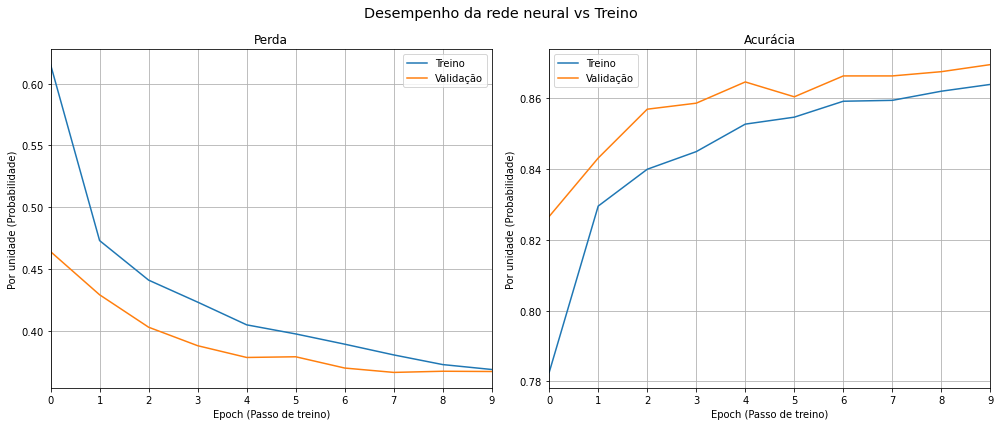

In [35]:
fig, ax = plt.subplots(1,2,figsize=(14,6))

keys = {"loss":"Treino","val_loss":"Predito"}

for i, ax in enumerate(ax):
    for j, key in zip(np.arange(0,3,2)+i,history.history.keys()):
        data = np.array(list(history.history.values())[j])
        key = list(history.history.keys())[j]
        ax.plot(data,label="Validação" if "val" in key else "Treino")
        ax.legend()
        ax.grid(True)
        ax.set_xticks(np.arange(10))
        ax.set_xlim(0,9)
        ax.set_xlabel('Epoch (Passo de treino)')
        ax.set_ylabel('Por unidade (Probabilidade)')
        ax.set_title('Acurácia' if "accuracy" in key else "Perda")
fig.suptitle('Desempenho da rede neural vs Treino',fontsize='x-large');
plt.tight_layout();

O último valor dos arrays de validação e perda são os resultados de perda e validação encontrado na seção de avaliação.

In [36]:
loss = history.history["val_loss"][-1]
accuracy = history.history["val_sparse_categorical_accuracy"][-1]

print(f"Os valores de perda e acurácia da validação são: {loss} {accuracy}")

Os valores de perda e acurácia da validação são: 0.36734163761138916 0.8694999814033508


## Métricas do Sklearn

In [39]:
import sklearn

### Matriz de confusão

Criando a matriz:

In [54]:
confusion_matrix=sklearn.metrics.confusion_matrix(y_test, #Valores reais
                                                  Predictions #Valores preditos
                                                 )
print(confusion_matrix)

[[910   1  12  36   1   1  33   0   6   0]
 [ 19 959   0  20   2   0   0   0   0   0]
 [137   1 740   6 101   0  15   0   0   0]
 [ 78   7   3 876  30   0   5   0   1   0]
 [ 85   1  85  24 777   0  27   0   1   0]
 [  2   0   0   0   0 959   0  24   2  13]
 [346   1  89  26  85   0 447   0   6   0]
 [  3   0   0   0   0  23   0 950   0  24]
 [ 37   0   3   2   3   3   1   5 946   0]
 [  3   0   0   0   0   9   1  36   0 951]]


Plotando a matriz:

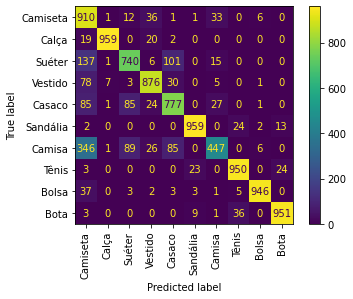

In [88]:
# Cria o objeto de confusion matrix display
cm=sklearn.metrics.ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix, # Matriz de confusão
    display_labels=Labels #Labels
);
# Usa o método plot para mostrar a matriz de confusão
#cm.im_

cm.plot(xticks_rotation='vertical');

### Classification Report

Precision, Recall, f1-score e support

In [61]:
print(sklearn.metrics.classification_report(y_test, #Valores reais
                                            Predictions, # Valores preditos
                                            target_names=Labels # Nome das Labels
                                           ))

              precision    recall  f1-score   support

    Camiseta       0.56      0.91      0.69      1000
       Calça       0.99      0.96      0.97      1000
      Suéter       0.79      0.74      0.77      1000
     Vestido       0.88      0.88      0.88      1000
      Casaco       0.78      0.78      0.78      1000
    Sandália       0.96      0.96      0.96      1000
      Camisa       0.84      0.45      0.58      1000
       Tênis       0.94      0.95      0.94      1000
       Bolsa       0.98      0.95      0.96      1000
        Bota       0.96      0.95      0.96      1000

    accuracy                           0.85     10000
   macro avg       0.87      0.85      0.85     10000
weighted avg       0.87      0.85      0.85     10000



## Visualização das imagens

Podemos utilizar o método `__call__` para testar a rede neural com os dados de teste:

In [37]:
Predictions=np.around(model.__call__(X_test))
Predictions

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

Como o resultado das predições é em `one_hot` devemos converter para inteiro:

In [38]:
Predictions=Predictions.argmax(axis=1)
Predictions

array([9, 2, 1, ..., 8, 1, 5])

Usamos a função de plotagem definida anteriormente:

 - Cada saída tem a seguinte configuração:
   - 0 Camistetas/Top (T-shirt/top)
   - 1 Calças (Trouser)
   - 2 Suéters (Pullover)
   - 3 Vestidos (Dress)
   - 4 Casacos (Coat)
   - 5 Sandálias (Sandal)
   - 6 Camisas (Shirt)
   - 7 Tênis (Sneaker)
   - 8 Bolsas (Bag)
   - 9 Botas (Ankle boot)

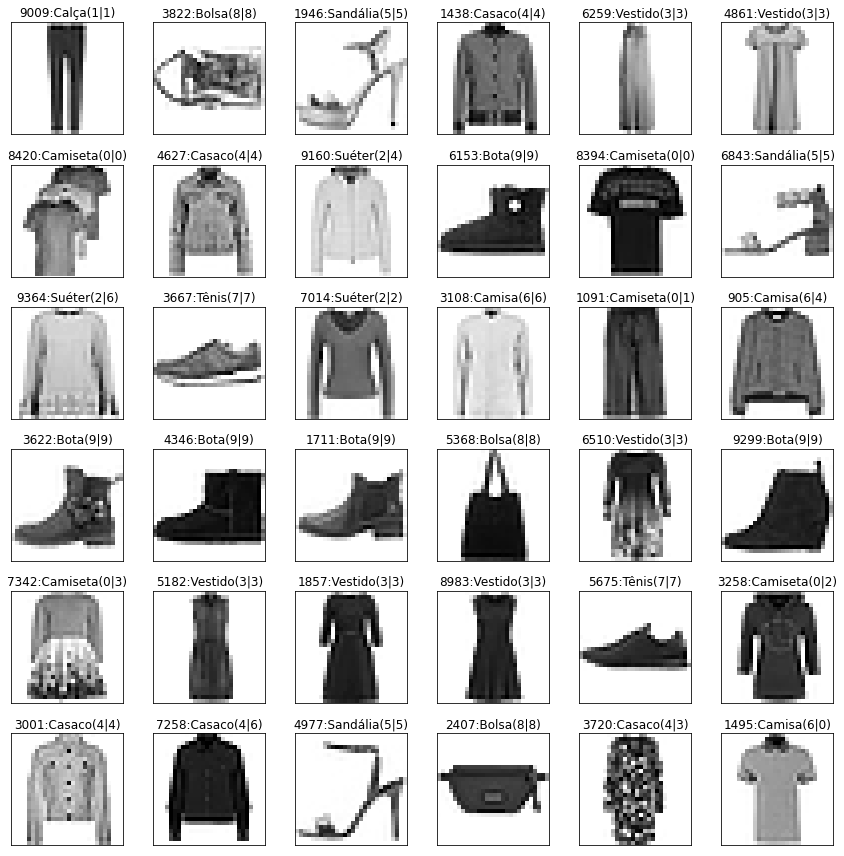

In [210]:
fig, ax = plt.subplots(6,6,figsize=(12,12),sharey=True,sharex=True)
# Gerar um índice aleatório de tamanho 36 (6x6)
random_i = np.random.randint(10000,size=36)

for j in range(6):
    for i in range(6):
        ax[i,j].imshow(x_test[random_i[6*i+j]],cmap=plt.cm.binary) #cmap=plt.cm.binary mostra a escala em preto e branco
        ax[i,j].set_title(f'{random_i[6*i+j]}:{Labels[Predictions[random_i[6*i+j]]]}({Predictions[random_i[6*i+j]]}|{y_test[random_i[6*i+j]]})')
        ax[i,j].set_yticks([])
        ax[i,j].set_xticks([])
plt.tight_layout()

# Etapa 7: Salvando a rede neural

## Obtendo os pesos

Podemos obter os pesos do treinamento através do método `model.get_weights()` que retorna uma lista de arrays com os pesos.

In [42]:
history.model.get_weights()[0]

array([[ 0.39349   ,  0.01822304,  0.1563294 , ..., -0.33786586,
        -0.11396848,  0.10679388],
       [ 0.32597268,  0.19360717,  0.1053132 , ...,  0.37399343,
         0.17681882, -0.21906778],
       [ 0.1797968 ,  0.22852597, -0.3933666 , ..., -0.4581975 ,
         0.32127103, -0.3396266 ],
       ...,
       [ 0.07756554,  0.6160051 ,  0.12134737, ..., -0.26162112,
         0.39746058,  0.24875247],
       [ 0.03087595,  0.9446857 , -0.39289364, ..., -0.36745667,
         0.09792382,  0.05007919],
       [ 0.30768824,  0.6352959 ,  0.05910398, ...,  0.45416534,
         0.8660348 ,  0.15069114]], dtype=float32)

## Salvando o modelo

Podemos salvar os pesos em um algoritmo para uma posterior análise sem a necessidade de um treino posterior.

Para isso usamos o método `save`:

In [94]:
# Salvando o modelo no arquivo 'rede.h5'
model.save('rede.h5')

In [201]:
# Deletando a variável
del model

Carregamos o modelo salvo através da função `keras.models.load_model`:

In [206]:
model = keras.models.load_model('rede.h5')

Podemos verificar os pesos:

In [207]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(784, 128) dtype=float32, numpy=
 array([[ 0.39349   ,  0.01822304,  0.1563294 , ..., -0.33786586,
         -0.11396848,  0.10679388],
        [ 0.32597268,  0.19360717,  0.1053132 , ...,  0.37399343,
          0.17681882, -0.21906778],
        [ 0.1797968 ,  0.22852597, -0.3933666 , ..., -0.4581975 ,
          0.32127103, -0.3396266 ],
        ...,
        [ 0.07756554,  0.6160051 ,  0.12134737, ..., -0.26162112,
          0.39746058,  0.24875247],
        [ 0.03087595,  0.9446857 , -0.39289364, ..., -0.36745667,
          0.09792382,  0.05007919],
        [ 0.30768824,  0.6352959 ,  0.05910398, ...,  0.45416534,
          0.8660348 ,  0.15069114]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(128,) dtype=float32, numpy=
 array([ 0.7475016 ,  0.6552909 ,  0.33071285,  0.6500958 ,  0.20674488,
        -0.01661906, -0.02209011,  0.56749713, -0.00998261,  0.38960454,
        -0.16116963,  0.77515423, -0.11162116, -0.42078802, -0.09195705,
    

## Salvando o histórico

O histórico é um dicionário, podemos salvá-lo utilizando o pandas:

In [105]:
import pandas as pd

Convertemos para um dataframe

In [119]:
hist_df = pd.DataFrame(history.history)
hist_df.index.name = 'Epoch'
hist_df

loss  sparse_categorical_accuracy  val_loss  \
Epoch                                                    
0      0.317509                     0.881700  0.370645   
1      0.315587                     0.881567  0.347232   
2      0.314360                     0.882417  0.339427   
3      0.314167                     0.882317  0.342301   
4      0.310044                     0.882350  0.347988   
5      0.307907                     0.883617  0.350638   
6      0.305147                     0.883500  0.344810   
7      0.307556                     0.884417  0.339923   
8      0.306503                     0.884333  0.345279   
9      0.300988                     0.887900  0.340946   

       val_sparse_categorical_accuracy  
Epoch                                   
0                               0.8666  
1                               0.8827  
2                               0.8840  
3                               0.8832  
4                               0.8824  
5                               0.8822  
6                               0.8825  
7                               0.8832  
8                               0.8794  
9                               0.8819

Salvando o arquivo:

In [120]:
history_file='history.csv'

In [121]:
with open(history_file,mode='w') as f:
    hist_df.to_csv(f)

Carregando o arquivo novamente:

In [156]:
pd.read_csv(history_file).to_dict()

{'Epoch': {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9},
 'loss': {0: 0.3175089955329895,
  1: 0.3155870735645294,
  2: 0.3143600821495056,
  3: 0.3141672611236572,
  4: 0.3100438416004181,
  5: 0.3079067766666412,
  6: 0.3051470518112182,
  7: 0.3075558841228485,
  8: 0.3065025806427002,
  9: 0.3009882271289825},
 'sparse_categorical_accuracy': {0: 0.8816999793052673,
  1: 0.8815666437149048,
  2: 0.8824166655540466,
  3: 0.8823166489601135,
  4: 0.8823500275611877,
  5: 0.8836166858673096,
  6: 0.8834999799728394,
  7: 0.8844166398048401,
  8: 0.8843333125114441,
  9: 0.8878999948501587},
 'val_loss': {0: 0.3706447780132293,
  1: 0.3472315967082977,
  2: 0.3394272923469543,
  3: 0.3423011004924774,
  4: 0.3479882180690765,
  5: 0.3506382405757904,
  6: 0.344809740781784,
  7: 0.3399228751659393,
  8: 0.3452788293361664,
  9: 0.3409458100795746},
 'val_sparse_categorical_accuracy': {0: 0.866599977016449,
  1: 0.8827000260353088,
  2: 0.8840000033378601,
  3: 0.883199989

# Tarefa: Melhorar a rede neural anterior

- Carregar a base de dados

In [8]:
[x, y], [x_val, y_val] = keras.datasets.fashion_mnist.load_data();

- Normalizar os dados

In [9]:
x=x/255
x_val=x_val/255

- Criar o modelo da rede neural:

In [10]:
model = keras.models.Sequential([
        # Camada de entrada
        keras.layers.Flatten(input_shape=(28,28)),
        # Camadas internas
        keras.layers.Dense(units=512,activation='relu'),
        keras.layers.Dropout(rate=0.5),
        keras.layers.Dense(units=256,activation='relu'),
        keras.layers.Dropout(rate=0.5),
        keras.layers.Dense(units=128,activation='sigmoid'),
        keras.layers.Dropout(rate=0.2),
        keras.layers.Dense(units=64,activation='sigmoid'),
        keras.layers.Dropout(rate=0.8),
        # Camada de saída
        keras.layers.Dense(units=10,activation='softmax')]
    )

Compilando a rede neural:

In [11]:
opt = keras.optimizers.Adam(learning_rate=2e-3) # https://keras.io/api/optimizers/ learning_rate=0.01

model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics='accuracy'
             )

In [17]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)              

Mostrar a rede neural:

https://github.com/paulgavrikov/visualkeras/

```
https://github.com/paulgavrikov/visualkeras/
```

Tutorial:

https://github.com/ashishpatel26/Tools-to-Design-or-Visualize-Architecture-of-Neural-Network

```
import visualkeras

model = ...

visualkeras.layered_view(model).show() # display using your system viewer
visualkeras.layered_view(model, to_file='output.png') # write to disk
visualkeras.layered_view(model, to_file='output.png').show() # write and show

visualkeras.layered_view(model)

```

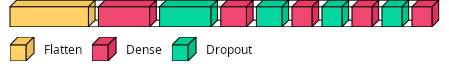

In [19]:
import visualkeras
from PIL import ImageFont #Carrega o módulo de fonte para imagem

font = ImageFont.truetype("NotoSans-Regular.ttf", 12)  # using comic sans is strictly prohibited!

visualkeras.layered_view(model,to_file='output.png',legend=True, font=font)

Treinando a rede neural:

In [18]:
epochs=50

In [19]:
# Modifica o learnrate se houver estagnação por 10 epoches na ordem de 0.1
# Quanto menor o learnrate maior a taxa de busca
# Fonte: https://machinelearningmastery.com/understand-the-dynamics-of-learning-rate-on-deep-learning-neural-networks/
rlrop = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=int(epochs/10))

# Define um descrescimento exponencial
lrs = keras.callbacks.LearningRateScheduler(lambda epoch, lrate: lrate*1e2**(-(epoch-1)/epochs))

history = model.fit(x=x, #Imagens
                    y=y, #Classes
                    validation_data=(x_val,y_val), #Imagens de teste
                    epochs=epochs, #Passos
                    callbacks=[rlrop,lrs]
                   );

Epoch 1/50
1875/1875 [==============================] - 22s 11ms/step - loss: 1.6033 - accuracy: 0.3667 - val_loss: 0.7410 - val_accuracy: 0.7080
Epoch 2/50
1875/1875 [==============================] - 20s 11ms/step - loss: 0.9650 - accuracy: 0.6178 - val_loss: 0.6438 - val_accuracy: 0.7318
Epoch 3/50
1875/1875 [==============================] - 16s 8ms/step - loss: 0.8744 - accuracy: 0.6606 - val_loss: 0.5932 - val_accuracy: 0.7585
Epoch 4/50
1875/1875 [==============================] - 13s 7ms/step - loss: 0.8316 - accuracy: 0.6799 - val_loss: 0.5979 - val_accuracy: 0.7522
Epoch 5/50
1875/1875 [==============================] - 18s 10ms/step - loss: 0.8041 - accuracy: 0.6836 - val_loss: 0.5633 - val_accuracy: 0.7794
Epoch 6/50
1875/1875 [==============================] - 17s 9ms/step - loss: 0.7681 - accuracy: 0.7040 - val_loss: 0.5593 - val_accuracy: 0.7680
Epoch 7/50
1875/1875 [==============================] - 27s 14ms/step - loss: 0.7447 - accuracy: 0.7144 - val_loss: 0.5378 - va

Plotando o treino:

In [480]:
fig_name='tarefa6.svg'

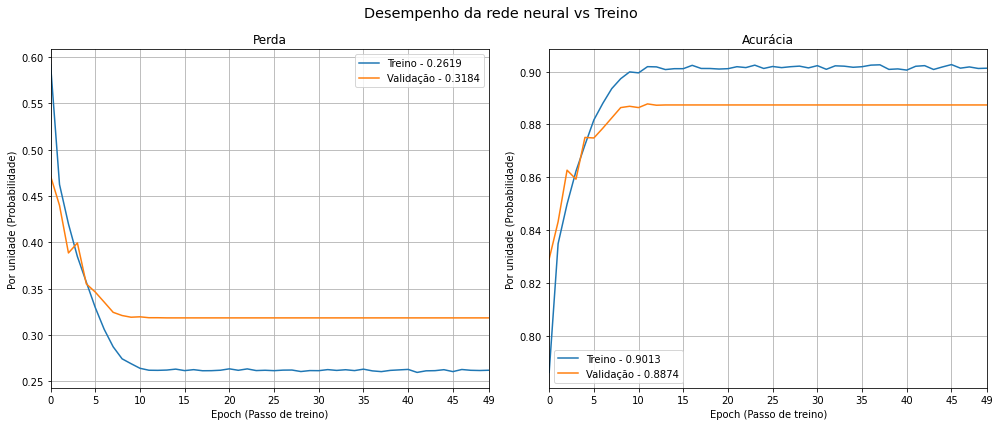

In [481]:
fig, ax = plt.subplots(1,2,figsize=(14,6))

keys = {"loss":"Treino","val_loss":"Predito"}

for i, ax in enumerate(ax):
    for j, key in zip(np.arange(0,3,2)+i,history.history.keys()):
        data = np.array(list(history.history.values())[j])
        key = list(history.history.keys())[j]
        ax.plot(data,label=("Validação" if "val" in key else "Treino")+f' - {data[-1]:.4f}')
        ax.legend()
        ax.grid(True)
        ax.set_xticks(np.r_[np.arange(0,data.size,np.round(data.size/10)),data.size-1])
        ax.set_xlim(0,data.size-1)
        ax.set_xlabel('Epoch (Passo de treino)')
        ax.set_ylabel('Por unidade (Probabilidade)')
        ax.set_title(('Acurácia' if "accuracy" in key else "Perda"))
fig.suptitle('Desempenho da rede neural vs Treino',fontsize='x-large');
plt.tight_layout();
fig.savefig(fig_name);

Calculando as predições:

In [482]:
Predictions=model.__call__(X_test).numpy().argmax(axis=1)
Predictions

array([9, 2, 1, ..., 8, 1, 5])

Métricas do Sklearn:

In [89]:
import sklearn

Matriz de confusão:

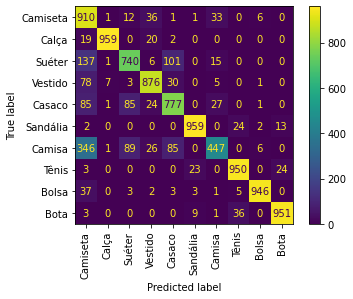

In [90]:
confusion_matrix=sklearn.metrics.confusion_matrix(y_test, #Valores reais
                                                  Predictions #Valores preditos
                                                 )
# Cria o objeto de confusion matrix display
cm=sklearn.metrics.ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix, # Matriz de confusão
    display_labels=Labels #Labels
);
# Usa o método plot para mostrar a matriz de confusão
#cm.im_

cm.plot(xticks_rotation='vertical');

Classification Report

In [91]:
print(sklearn.metrics.classification_report(y_test, #Valores reais
                                            Predictions, # Valores preditos
                                            target_names=Labels # Nome das Labels
                                           ))

              precision    recall  f1-score   support

    Camiseta       0.56      0.91      0.69      1000
       Calça       0.99      0.96      0.97      1000
      Suéter       0.79      0.74      0.77      1000
     Vestido       0.88      0.88      0.88      1000
      Casaco       0.78      0.78      0.78      1000
    Sandália       0.96      0.96      0.96      1000
      Camisa       0.84      0.45      0.58      1000
       Tênis       0.94      0.95      0.94      1000
       Bolsa       0.98      0.95      0.96      1000
        Bota       0.96      0.95      0.96      1000

    accuracy                           0.85     10000
   macro avg       0.87      0.85      0.85     10000
weighted avg       0.87      0.85      0.85     10000



Cada saída tem a seguinte configuração:
   - 0 Camistetas/Top (T-shirt/top)
   - 1 Calças (Trouser)
   - 2 Suéters (Pullover)
   - 3 Vestidos (Dress)
   - 4 Casacos (Coat)
   - 5 Sandálias (Sandal)
   - 6 Camisas (Shirt)
   - 7 Tênis (Sneaker)
   - 8 Bolsas (Bag)
   - 9 Botas (Ankle boot)

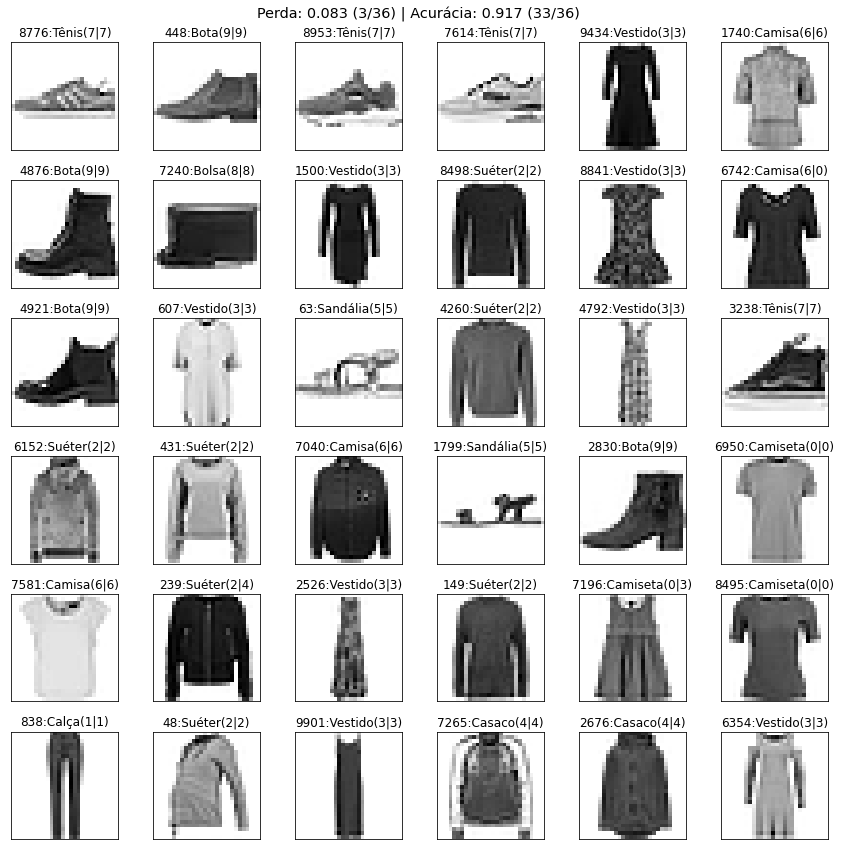

In [492]:
fig, ax = plt.subplots(6,6,figsize=(12,12),sharey=True,sharex=True)
# Gerar um índice aleatório de tamanho 36 (6x6)
random_i = np.random.randint(10000,size=36)

perda=0
acuracia=0
for j in range(6):
    for i in range(6):
        ax[i,j].imshow(x_test[random_i[6*i+j]],cmap=plt.cm.binary) #cmap=plt.cm.binary mostra a escala em preto e branco
        ax[i,j].set_title(f'{random_i[6*i+j]}:{Labels[Predictions[random_i[6*i+j]]]}({Predictions[random_i[6*i+j]]}|{y_test[random_i[6*i+j]]})')
        ax[i,j].set_yticks([])
        ax[i,j].set_xticks([])
        perda += int(Predictions[random_i[6*i+j]] != y_test[random_i[6*i+j]])
        acuracia += int(Predictions[random_i[6*i+j]] == y_test[random_i[6*i+j]])
fig.suptitle(f'Perda: {perda/36:.3f} ({perda}/36) | Acurácia: {acuracia/36:.3f} ({acuracia}/36)',fontsize='x-large')
plt.tight_layout()

Salvando o modelo:

In [484]:
model_f='tarefa6.h5'

In [485]:
model.save(model_f)

Carregando o modelo:

In [486]:
del model

In [487]:
model=keras.models.load_model(model_f)

Salvando o histórico:

In [488]:
history_f='history_tarefa6.csv'

In [489]:
hist_df = pd.DataFrame(history.history)
hist_df.index.name = 'Epoch'
with open(history_f,mode='w') as f:
    hist_df.to_csv(f)

Carregando o histórico:

In [490]:
history.history=pd.read_csv(history_f).to_dict()
history.history={key:list(history.history[key].values()) for key in history.history if key!='Epoch'}

# Anexos

## Logo UFAC

In [8]:
%reload_ext itikz
import numpy as np

In [51]:
%%writefile tikz_template.tex
\documentclass{standalone}
%\usepackage[margin=0cm,nohead]{geometry}
%\usepackage[active,tightpage]{preview}
\usepackage{color}
\usepackage{adjustbox}
\usepackage{tikz}
\usepackage[T1]{fontenc}% http://ctan.org/pkg/fontenc
\usepackage[outline]{contour}% http://ctan.org/pkg/contour
\usepackage{lmodern}

\definecolor{blue}{RGB}{12,77,162}
\definecolor{yellow}{RGB}{255,182,0}
                                      
%\PreviewEnvironment{tikzpicture}
\begin{document}
    {% block content %}
    {% endblock %}
\end{document}

Overwriting tikz_template.tex


In [159]:
d = {"tam": 0.15,"scale":0.92,"lw":0.16} #cm --temp-dir --print-jinja 

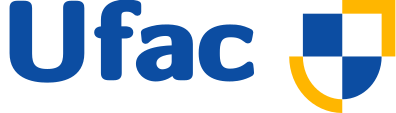

In [160]:
%%itikz --as-jinja --file-prefix ufac --temp-dir

{% extends "tikz_template.tex" %}

{% block content %}
\begin{adjustbox}{height=4 cm}
    \begin{tikzpicture}[
        centro/.style={fill=blue},
        borda/.style={yellow, line width = {{ np.round(d["tam"]*d["lw"]*2,6) }} cm}
    ]
    
    %\node at(0.14,0.008) {\includegraphics[height=0.4cm]{ufac-logo.png}};%
    \contourlength{0.2pt}
    \contournumber{10}%
    
    \node at({{ np.round(-d["tam"]*3,6) }},0) { };
    \begin{scope}[transform canvas={xscale={{ np.round(d["tam"]*8,6) }},yscale={{ np.round(d["tam"]*7.2,6) }} }]%,opacity=0.5
        \node at(-0.1,0.052) [font=\sffamily\bfseries,color=blue] {\fontseries{bx}\selectfont \contour{blue}{Ufac}};
    \end{scope}
    \begin{scope}[xshift={{ np.round(d["tam"]*4.2,6) }}cm, xscale = {{ d["scale"] }}]%,opacity=0.5
        \fill [centro] (0,0) rectangle ({{ -d["tam"] }},{{ d["tam"] }});
        \fill [centro] (0,0) -- ({{ d["tam"] }}, 0) arc (0:-90:{{ d["tam"] }}) -- cycle;
        \draw [borda] (0,{{ np.round(d["tam"]*(1+d["lw"]),6) }}) -| ({{ np.round(d["tam"]*(1+d["lw"]/d["scale"]),6) }}, 0);
        \draw [borda] (0,{{ np.round(-d["tam"]*(1+d["lw"]),6) }}) 
        arc(-90:-180:{{ np.round(d["tam"]*(1+d["lw"]/d["scale"]),6) }} and {{ np.round(d["tam"]*(1+d["lw"]),6) }});
    \end{scope}
    \end{tikzpicture}%
\end{adjustbox}
{% endblock %}